In [1]:
import requests
from lxml import html
import time
from datetime import datetime

num_of_stations = []
station_element = []
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
date_list = []

for i in range(2011,2111):
    
    # url to scrap data from
    link = 'https://www.aishub.net/stations/{}'.format(i)

    # path to particular element
    path = '/html/body/div/div/section[2]/div/div[2]/div/div[2]/div/div[1]/div[1]'

    response = requests.get(link)
    byte_string = response.content

    # get filtered source code
    source_code = html.fromstring(byte_string)

    # jump to preferred html element
    tree = source_code.xpath(path)

    # print texts in first element in list
    num_stats = tree[0].text_content()
    num_of_stations.append(num_stats)
    station_element.append(i)
    date_list.append(dt_string)
    print("Data scrapped from... ", i)
    time.sleep(1)

Data scrapped from...  2011
Data scrapped from...  2012
Data scrapped from...  2013
Data scrapped from...  2014
Data scrapped from...  2015
Data scrapped from...  2016
Data scrapped from...  2017
Data scrapped from...  2018
Data scrapped from...  2019
Data scrapped from...  2020
Data scrapped from...  2021
Data scrapped from...  2022
Data scrapped from...  2023
Data scrapped from...  2024
Data scrapped from...  2025
Data scrapped from...  2026
Data scrapped from...  2027
Data scrapped from...  2028
Data scrapped from...  2029
Data scrapped from...  2030
Data scrapped from...  2031
Data scrapped from...  2032
Data scrapped from...  2033
Data scrapped from...  2034
Data scrapped from...  2035
Data scrapped from...  2036
Data scrapped from...  2037
Data scrapped from...  2038
Data scrapped from...  2039
Data scrapped from...  2040
Data scrapped from...  2041
Data scrapped from...  2042
Data scrapped from...  2043
Data scrapped from...  2044
Data scrapped from...  2045
Data scrapped from..

In [2]:
print("Number of stations detected ... " , num_of_stations )
print("Area ID..." , station_element)
print("Date time.... ", date_list)

Number of stations detected ...  ['287', '0', '0', '11', '0', '2', '16', '0', '10', '86', '24', '91', '45', '0', '6', '0', '0', '14', '0', '53', '186', '153', '15', '19', '134', '0', '88', '23', '0', '4', '0', '136', '83', '94', '17', '0', '230', '0', '0', '0', '22', '10', '13', '13', '11', '89', '221', '79', '19', '42', '46', '189', '2276', '0', '269', '11', '0', '0', '0', '35', '0', '25', '91', '0', '0', '217', '974', '0', '0', '0', '0', '26', '356', '24', '26', '160', '0', '74', '0', '0', '0', '0', '125', '0', '2', '0', '534', '32', '0', '15', '0', '47', '0', '8', '106', '95', '0', '0', '8', '73']
Area ID... [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 20

In [5]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
df1=pd.DataFrame(num_of_stations )

In [4]:
df1

,0
0,287
1,0
2,0
3,11
4,0
...,...
95,95
96,0
97,0
98,8


In [5]:
df2=pd.DataFrame(station_element)
df2

,0
0,2011
1,2012
2,2013
3,2014
4,2015
...,...
95,2106
96,2107
97,2108
98,2109


In [6]:
df = pd.concat([df1, df2], axis=1)

In [7]:
df

,0,0
0,287,2011
1,0,2012
2,0,2013
3,11,2014
4,0,2015
...,...,...
95,95,2106
96,0,2107
97,0,2108
98,8,2109


In [8]:
 df.columns = ('{}'.format(date_list[0]), 'Area id')

In [9]:
df

,16/10/2021 10:32:05,Area id
0,287,2011
1,0,2012
2,0,2013
3,11,2014
4,0,2015
...,...,...
95,95,2106
96,0,2107
97,0,2108
98,8,2109


In [10]:
df.to_csv("day_4_morning.csv")

In [43]:
import glob

#df_final = pd.DataFrame(index=index, columns=columns)
#df_final = df_final.fillna(0)

csv_files = glob.glob("./*.csv")
#print(csv_files)
for i in range(len(csv_files)):
    csv_df = pd.read_csv(csv_files[i])
    if i == 0:
        final_copy = csv_df
        #print(final_copy)
        continue
    final_copy = pd.concat([final_copy, csv_df], axis=1)

print(final_copy)
    
    
    

    Unnamed: 0  16/10/2021 10:32:05  Area id  Unnamed: 0  12/10/2021 23:42:07  \
0            0                  287     2011           0                  288   
1            1                    0     2012           1                    0   
2            2                    0     2013           2                    0   
3            3                   11     2014           3                   11   
4            4                    0     2015           4                    0   
..         ...                  ...      ...         ...                  ...   
95          95                   95     2106          95                  183   
96          96                    0     2107          96                    0   
97          97                    0     2108          97                    0   
98          98                    8     2109          98                    9   
99          99                   73     2110          99                   66   

    Area id  Unnamed: 0  15

In [44]:
final_copy.columns

Index(['Unnamed: 0', '16/10/2021 10:32:05', 'Area id', 'Unnamed: 0',
       '12/10/2021 23:42:07', 'Area id', 'Unnamed: 0', '15/10/2021 14:41:20',
       'Area id', 'Unnamed: 0', '15/10/2021 19:46:39', 'Area id', 'Unnamed: 0',
       '15/10/2021 09:52:07', 'Area id', 'Unnamed: 0', '15/10/2021 23:12:45',
       'Area id', 'Unnamed: 0', '14/10/2021 23:07:41', 'Area id'],
      dtype='object')

In [45]:
final_copy.drop(columns=['Unnamed: 0'],inplace=True)

In [51]:
final_copy = final_copy.loc[:,~final_copy.columns.duplicated()]

#print(final_copy)

In [52]:
final_copy

,16/10/2021 10:32:05,Area id,12/10/2021 23:42:07,15/10/2021 14:41:20,15/10/2021 19:46:39,15/10/2021 09:52:07,15/10/2021 23:12:45,14/10/2021 23:07:41
0,287,2011,288,305,294,282,285,274
1,0,2012,0,0,0,0,0,0
2,0,2013,0,0,0,0,0,0
3,11,2014,11,14,15,15,17,19
4,0,2015,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
95,95,2106,183,275,206,341,199,236
96,0,2107,0,0,0,0,0,0
97,0,2108,0,0,0,0,0,0
98,8,2109,9,9,9,10,13,8


In [53]:
final_copy=final_copy[['Area id','12/10/2021 23:42:07','14/10/2021 23:07:41','15/10/2021 09:52:07','15/10/2021 14:41:20','15/10/2021 19:46:39','15/10/2021 23:12:45','16/10/2021 10:32:05']]

In [54]:
final_copy

,Area id,12/10/2021 23:42:07,14/10/2021 23:07:41,15/10/2021 09:52:07,15/10/2021 14:41:20,15/10/2021 19:46:39,15/10/2021 23:12:45,16/10/2021 10:32:05
0,2011,288,274,282,305,294,285,287
1,2012,0,0,0,0,0,0,0
2,2013,0,0,0,0,0,0,0
3,2014,11,19,15,14,15,17,11
4,2015,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
95,2106,183,236,341,275,206,199,95
96,2107,0,0,0,0,0,0,0
97,2108,0,0,0,0,0,0,0
98,2109,9,8,10,9,9,13,8


In [57]:
pip install matplotlib

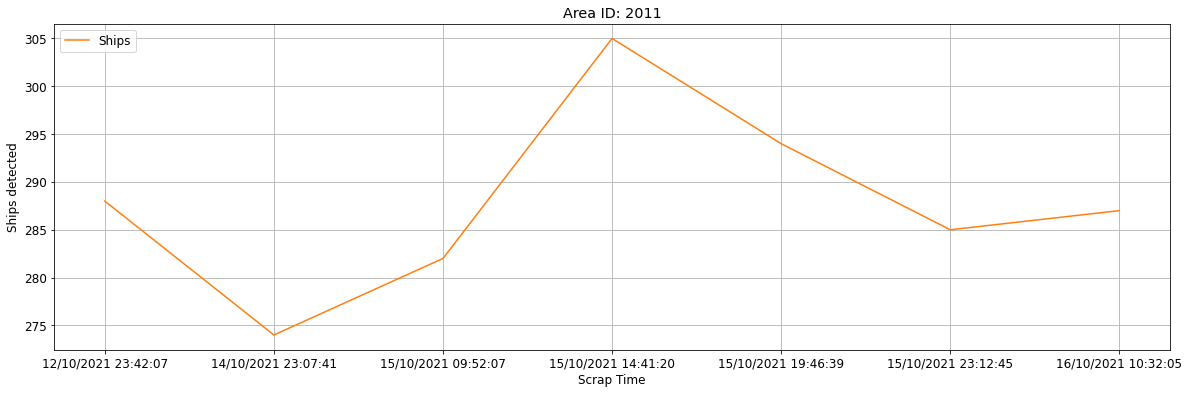

In [70]:

# Convention for import of the pyplot interface
import matplotlib.pyplot as plt

# Set-up to have matplotlib use its support for notebook inline plots
%matplotlib inline
 
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 6))

scrap_time = ["12/10/2021 23:42:07","14/10/2021 23:07:41","15/10/2021 09:52:07","15/10/2021 14:41:20","15/10/2021 19:46:39","15/10/2021 23:12:45","16/10/2021 10:32:05"]
y_ax = [final_copy["12/10/2021 23:42:07"][0],final_copy["14/10/2021 23:07:41"][0],final_copy["15/10/2021 09:52:07"][0],final_copy["15/10/2021 14:41:20"][0],final_copy["15/10/2021 19:46:39"][0],final_copy["15/10/2021 23:12:45"][0],final_copy["16/10/2021 10:32:05"][0]]
# Specify how our lines should look
ax.plot(scrap_time,y_ax, color='tab:orange', label='Ships')

# Same as above
ax.set_xlabel('Scrap Time')
ax.set_ylabel('Ships detected')
ax.set_title('Area ID: {}'.format(final_copy["Area id"][0]))
ax.grid(True)
ax.legend(loc='upper left');

C:\Users\91602\AppData\Local\Temp/ipykernel_11776/4090931881.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20, 6))


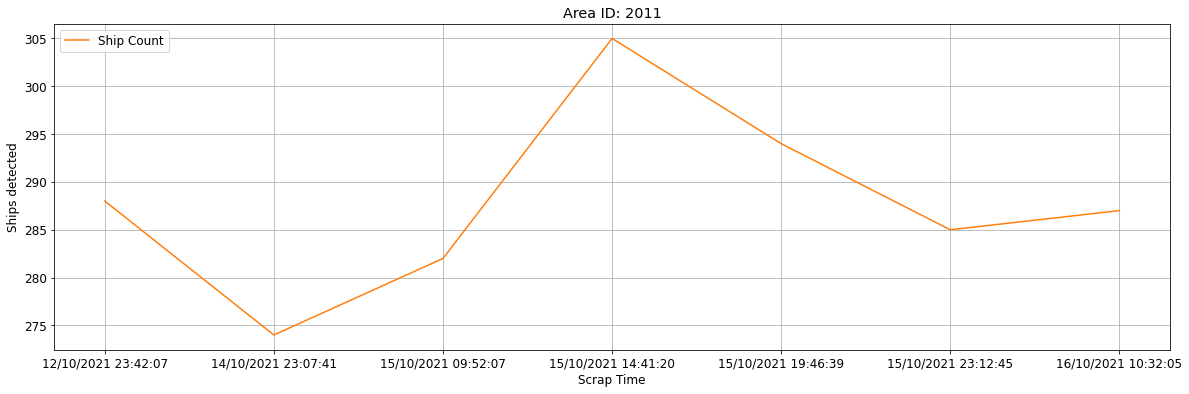

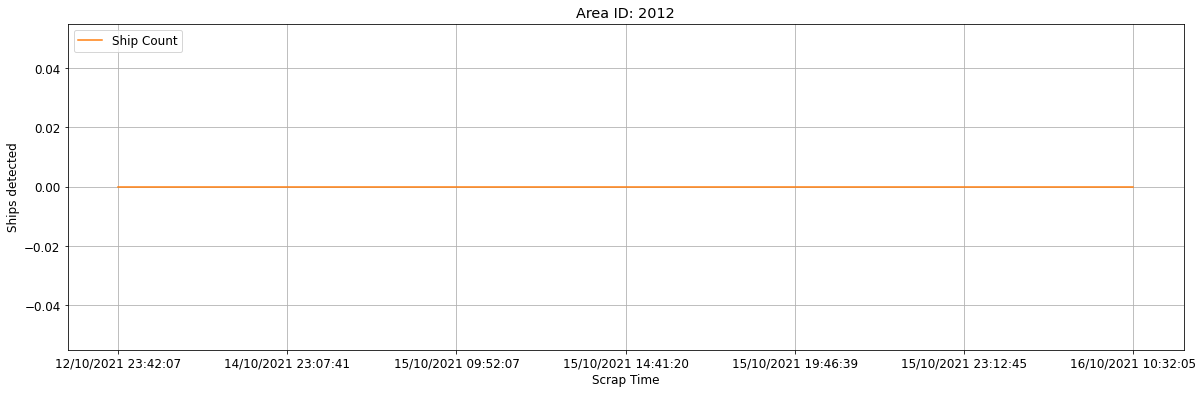

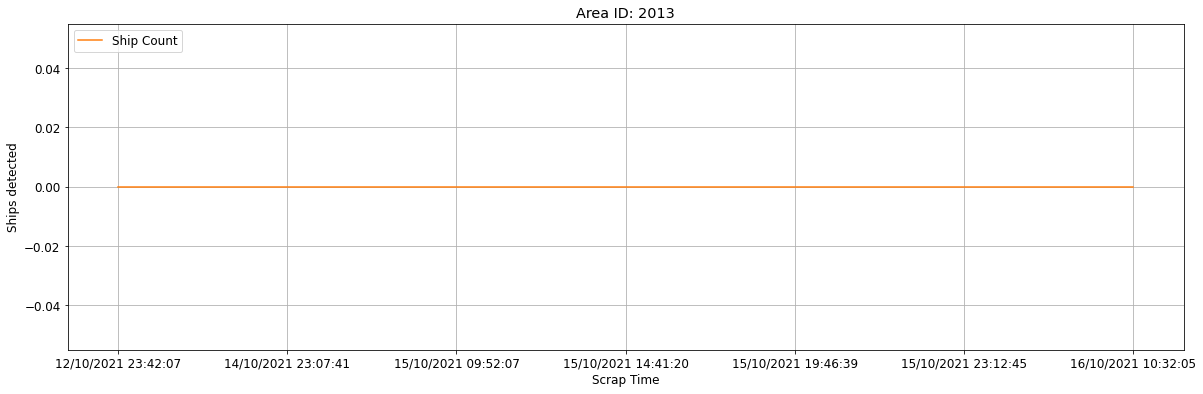

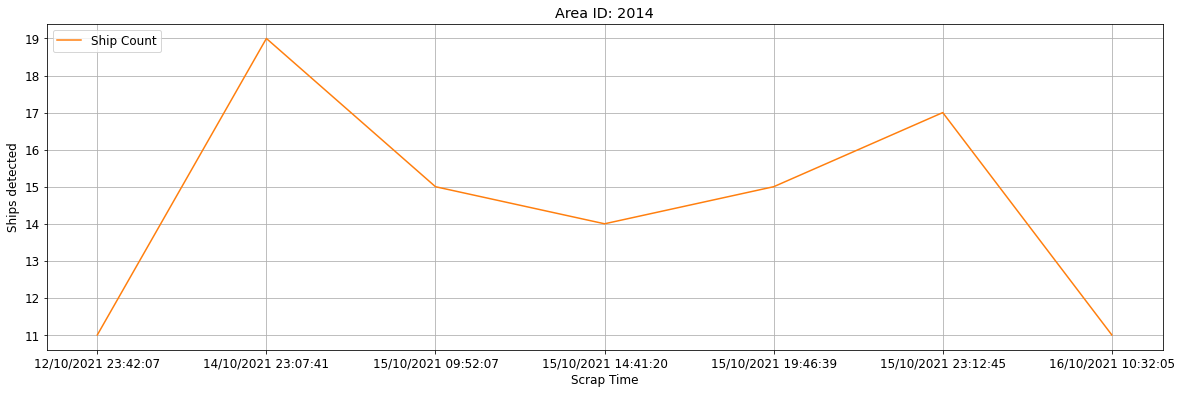

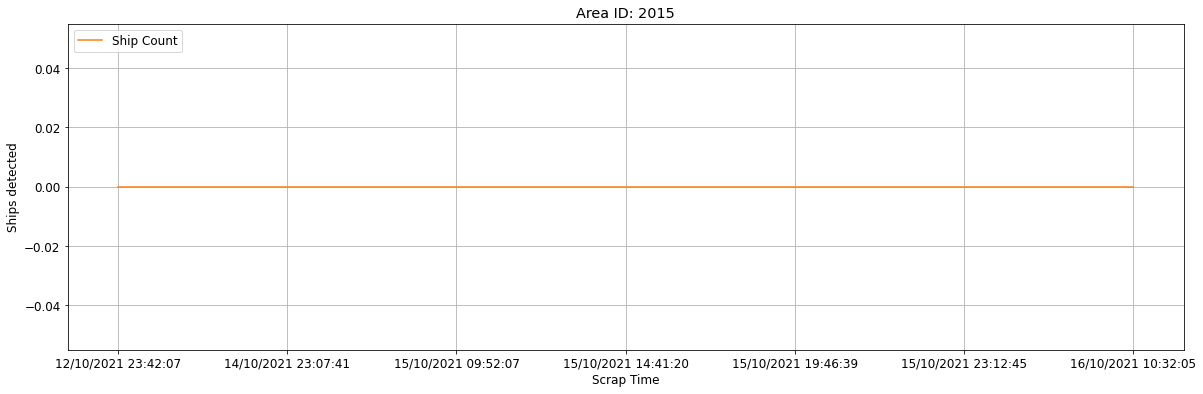

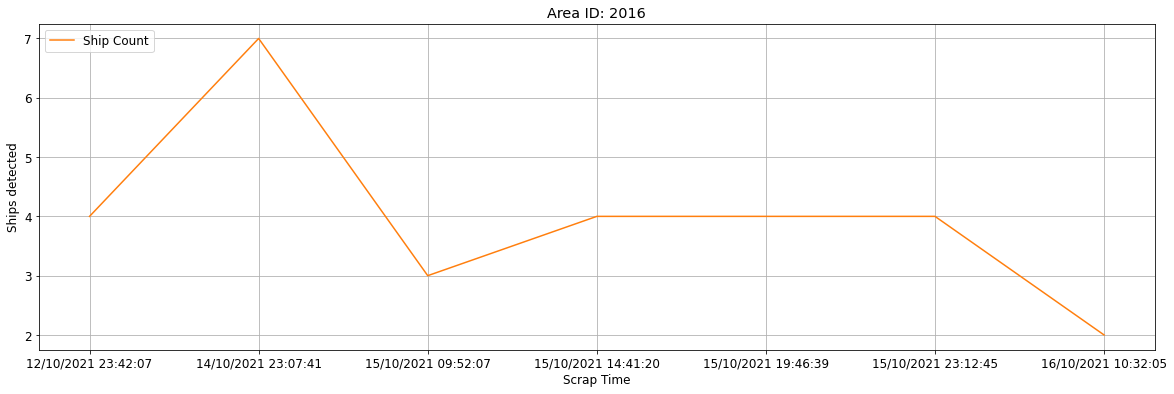

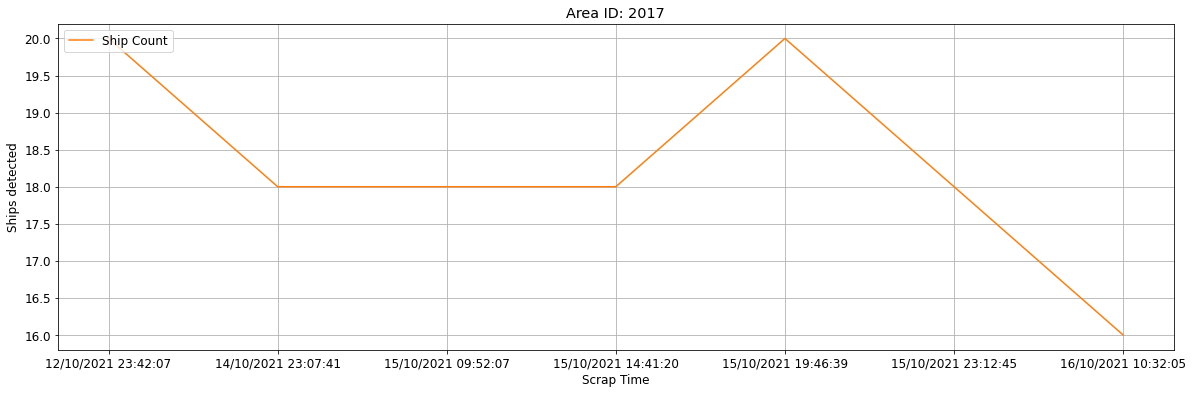

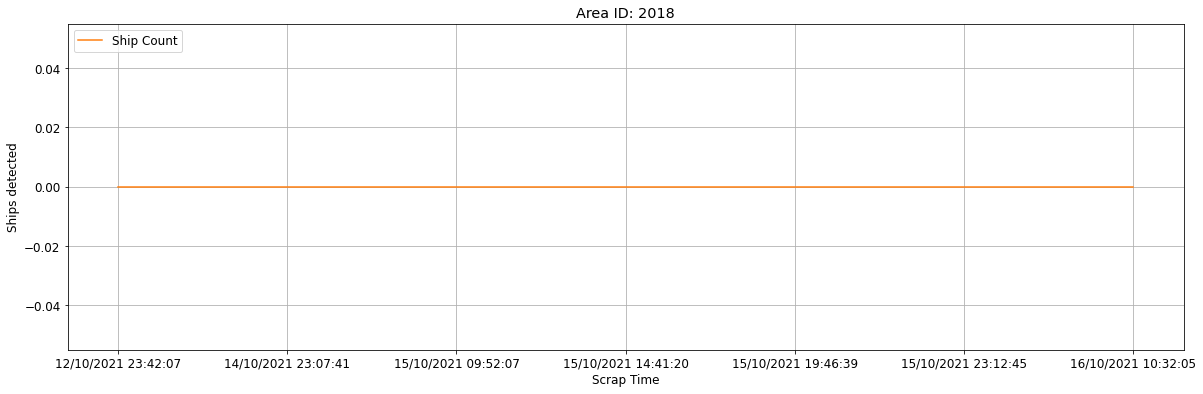

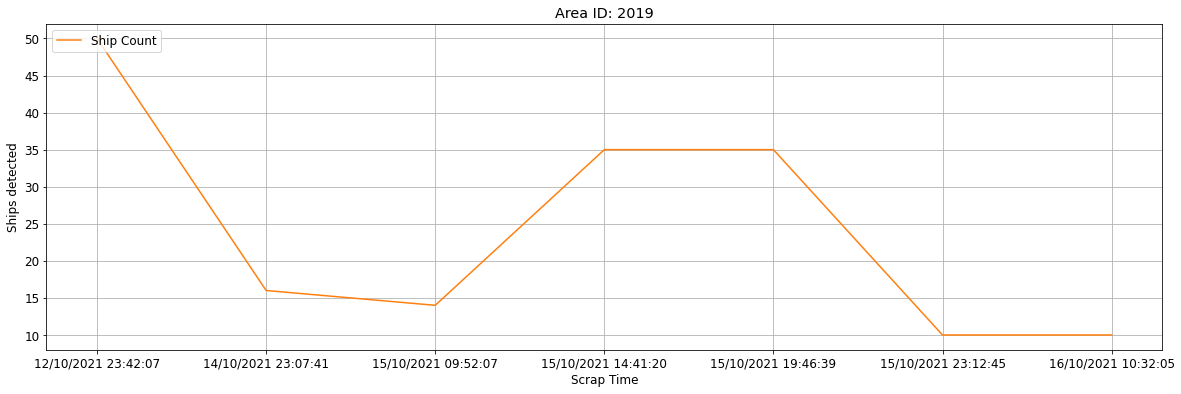

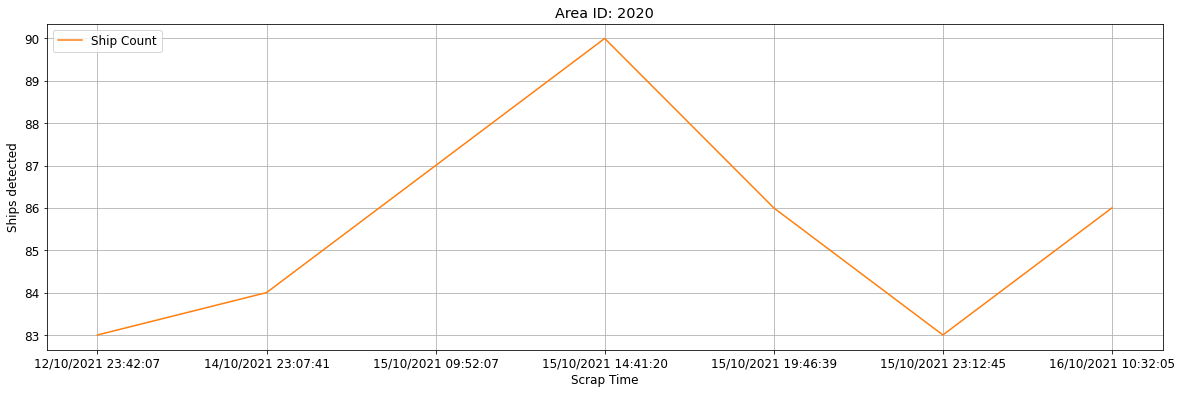

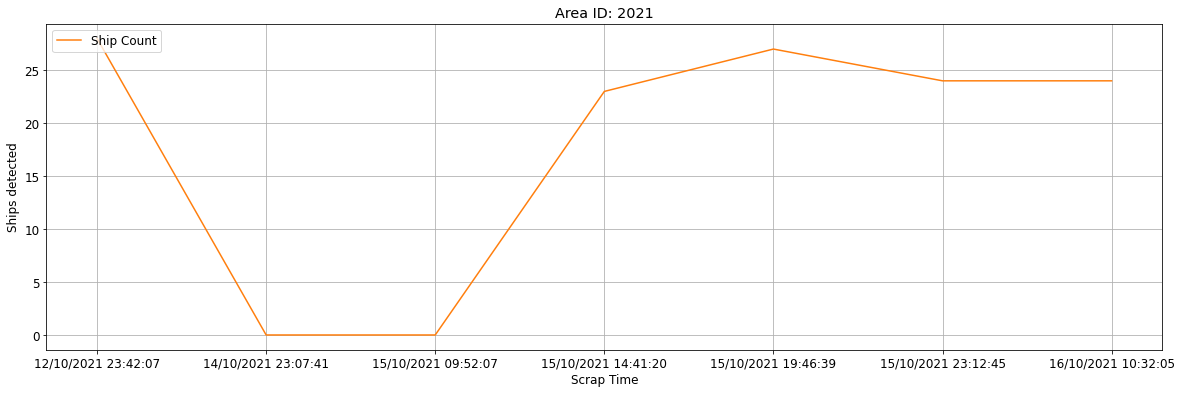

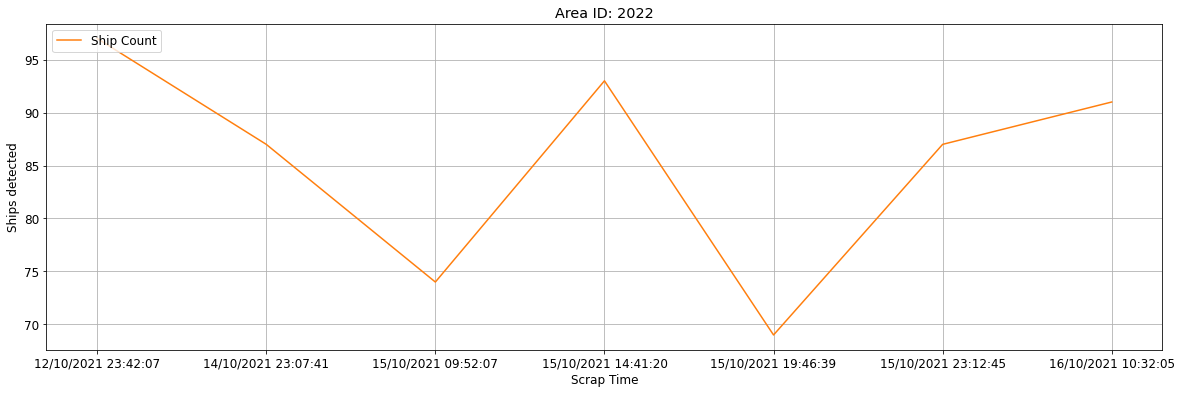

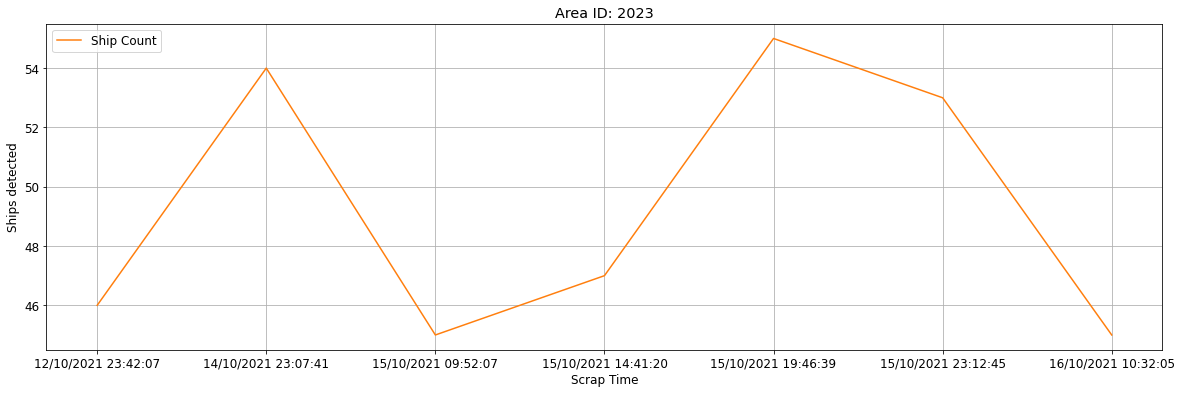

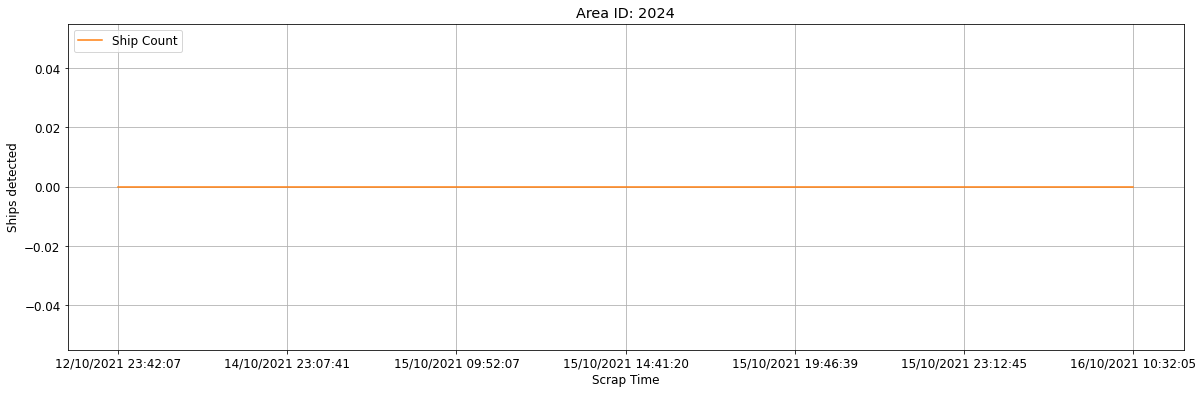

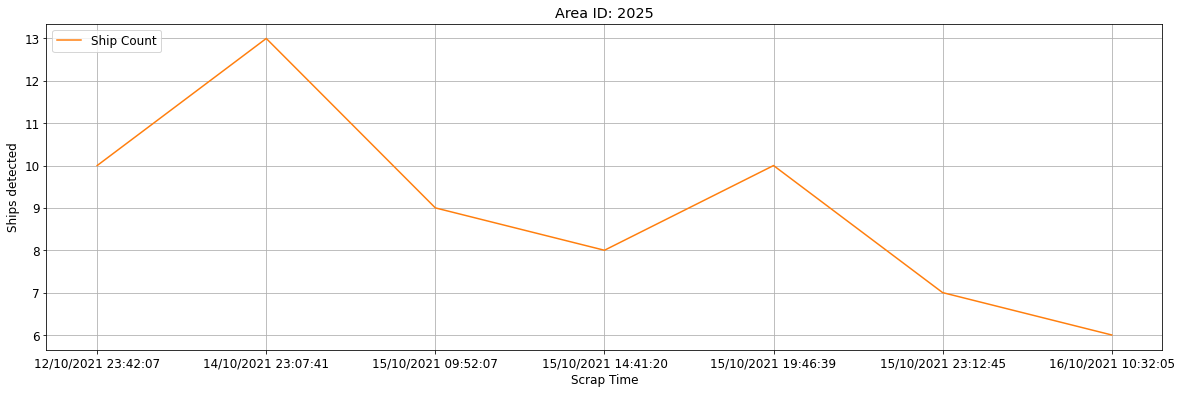

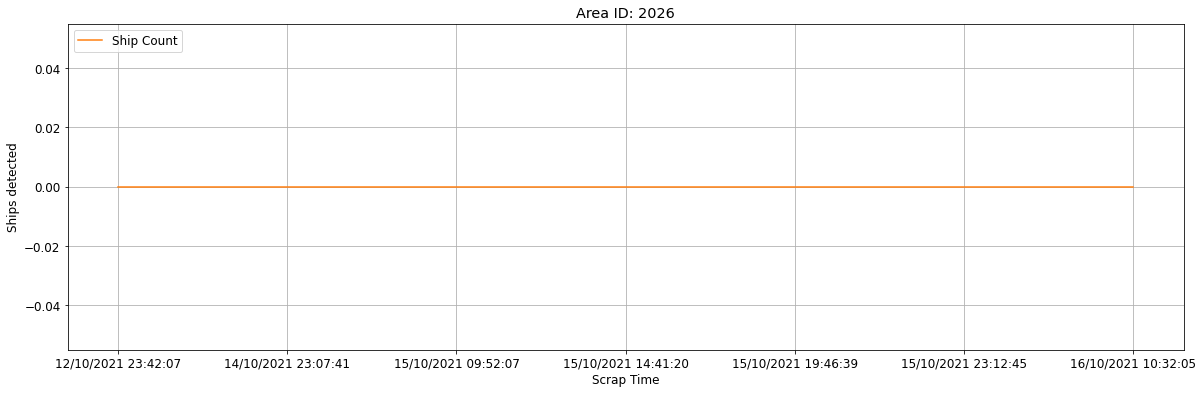

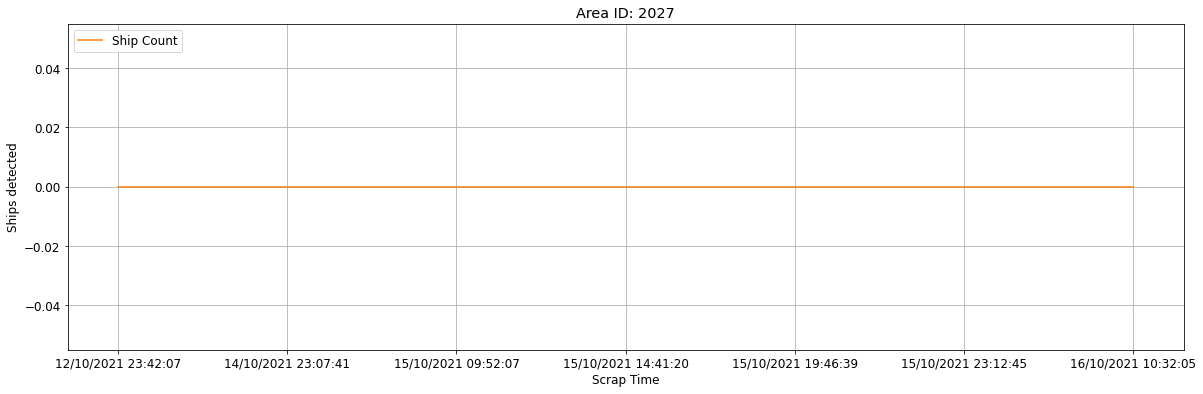

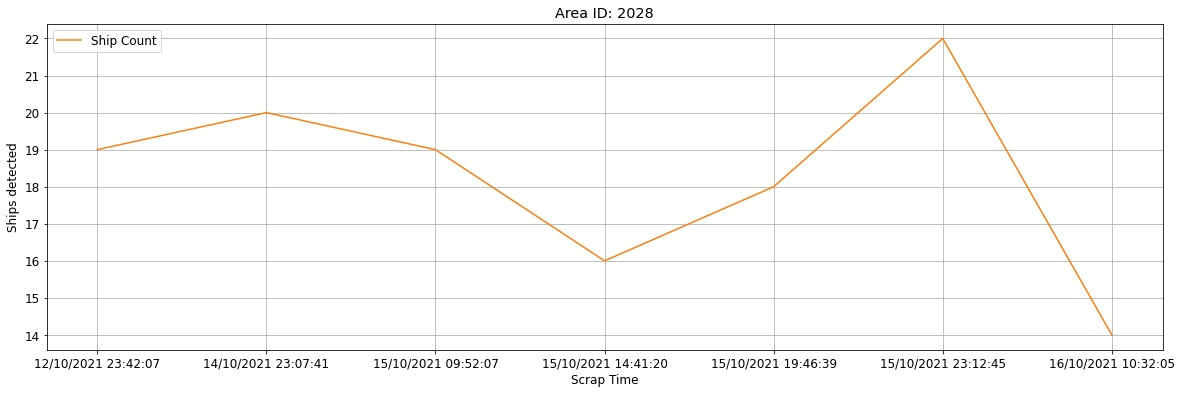

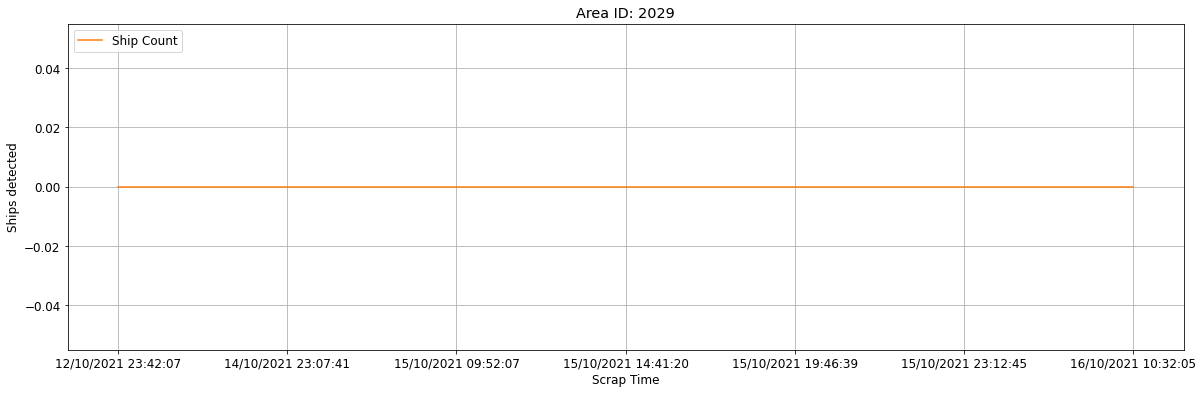

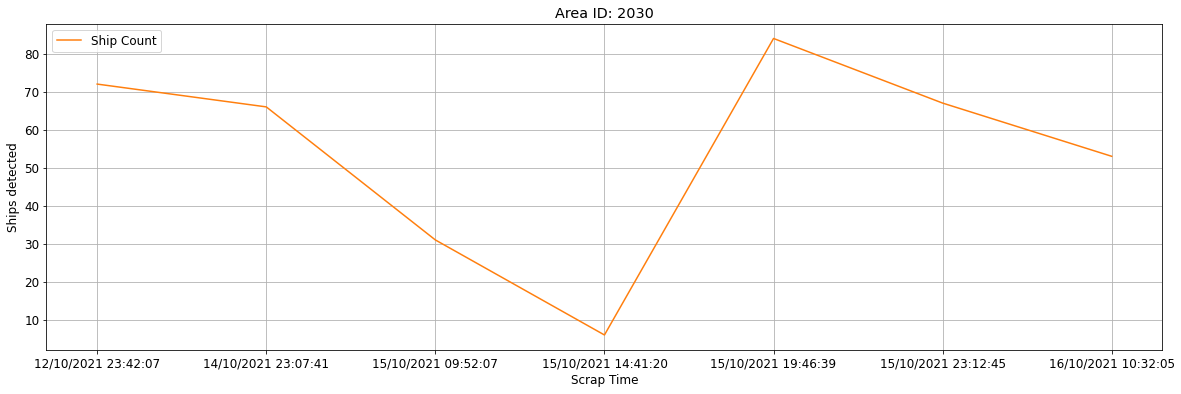

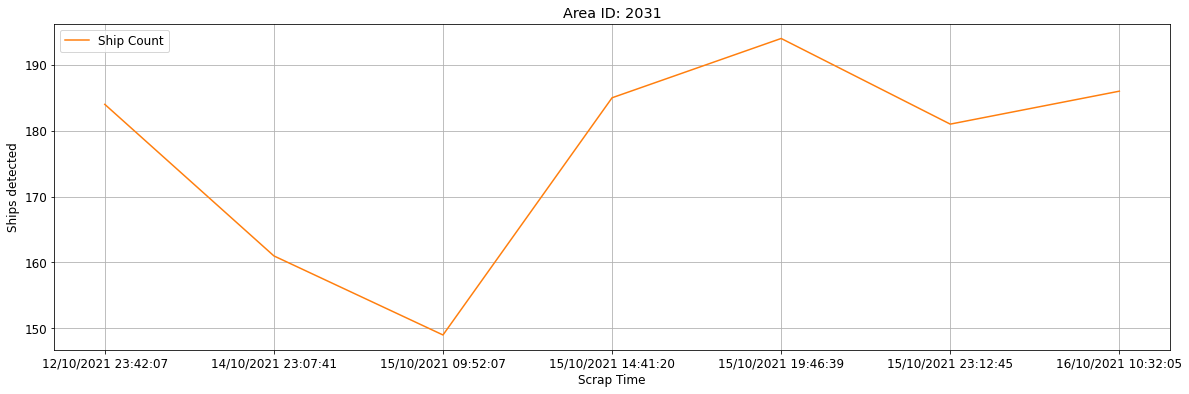

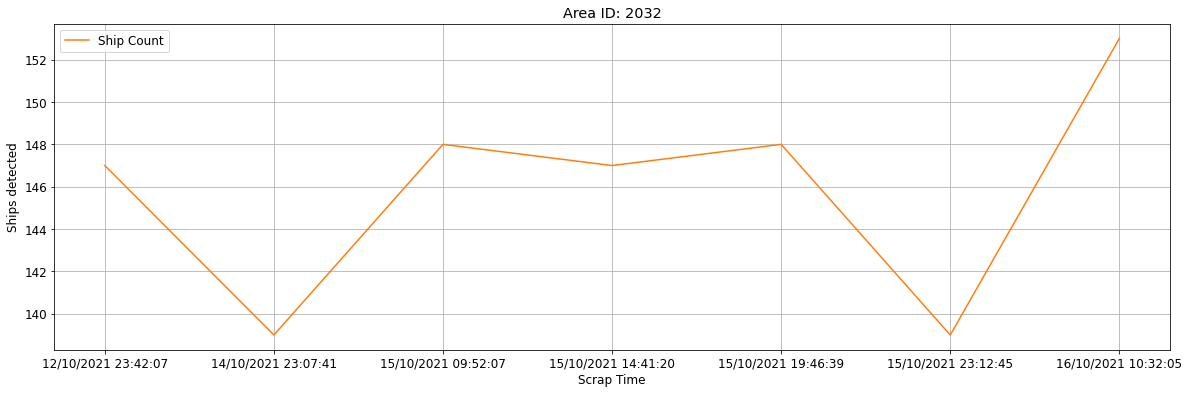

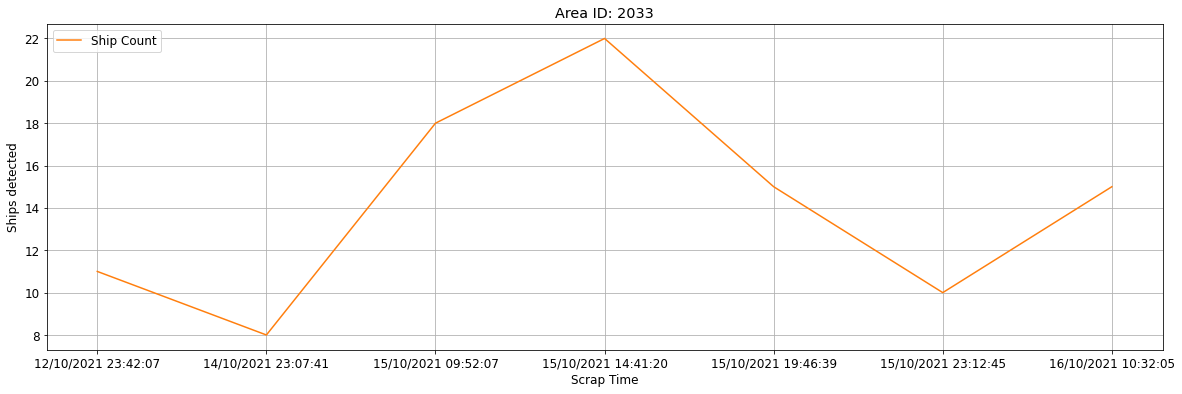

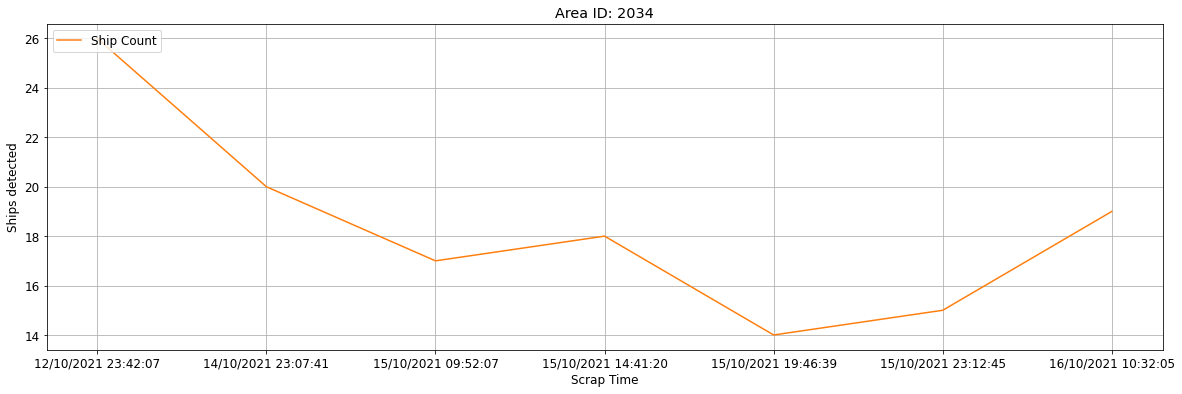

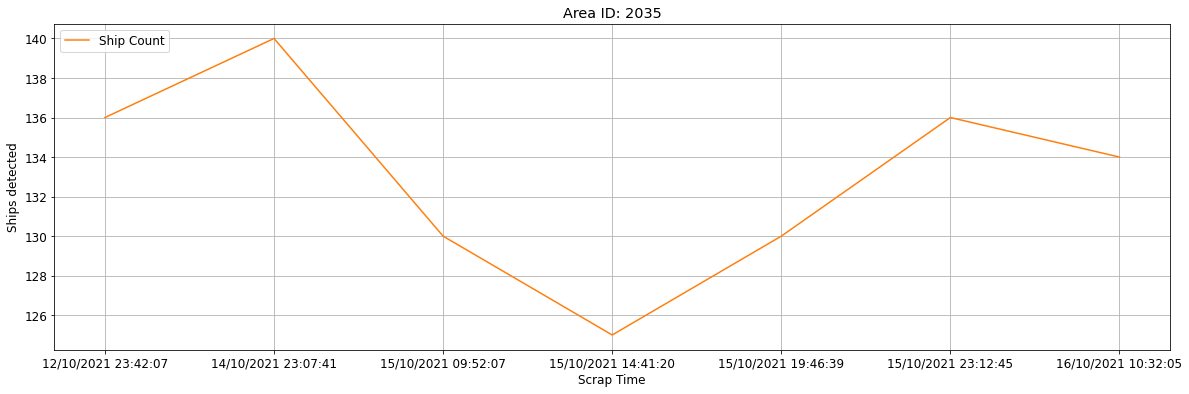

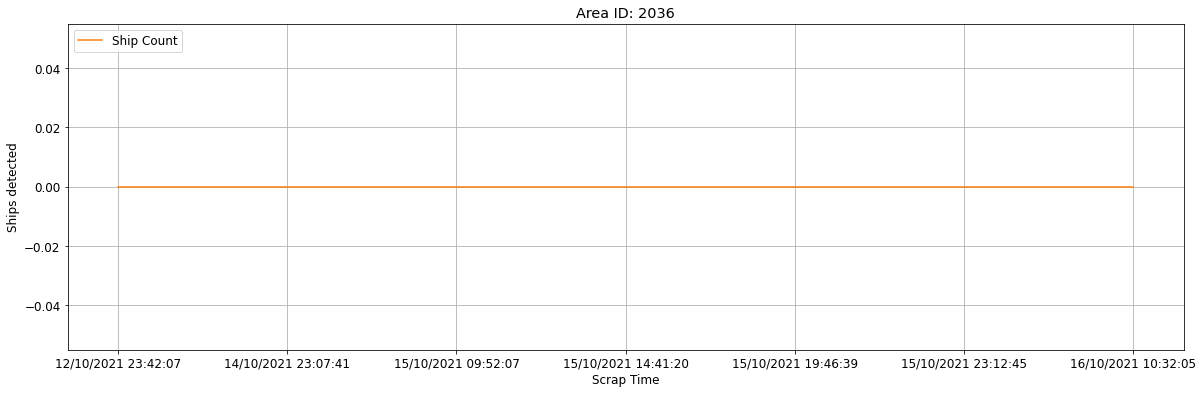

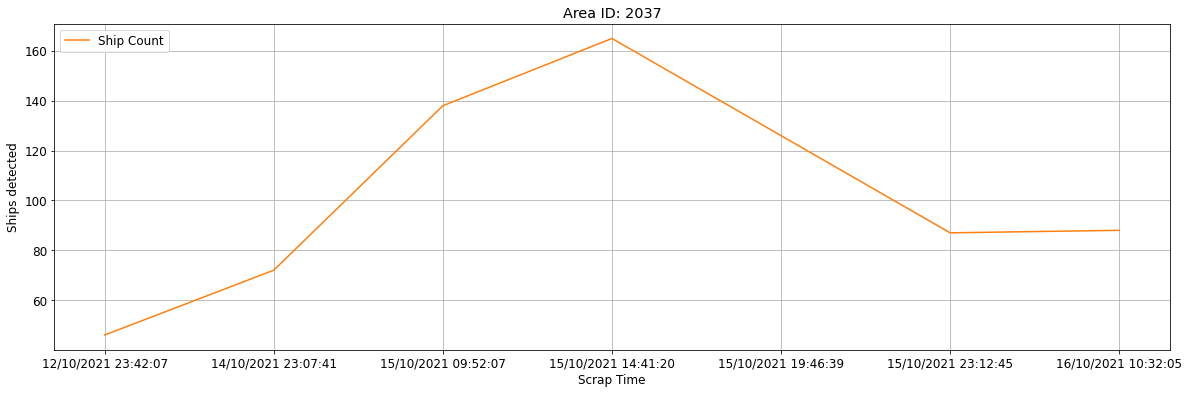

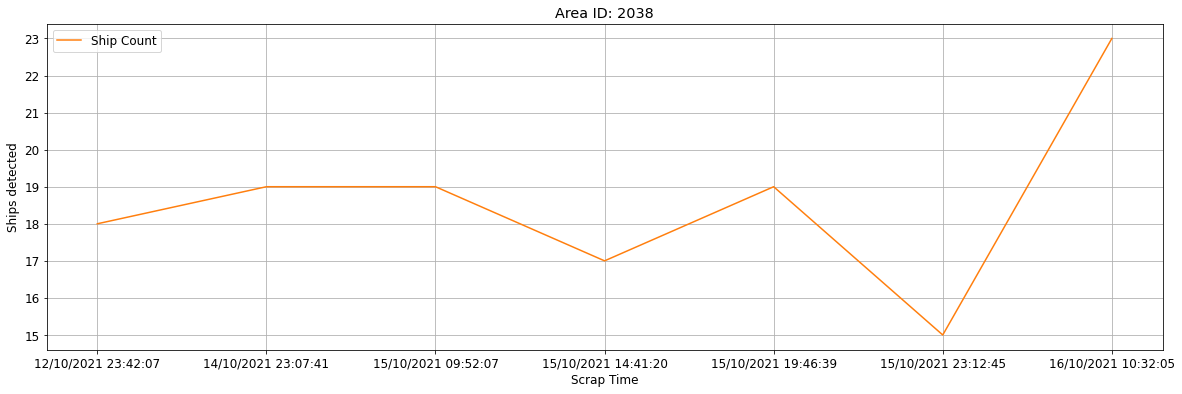

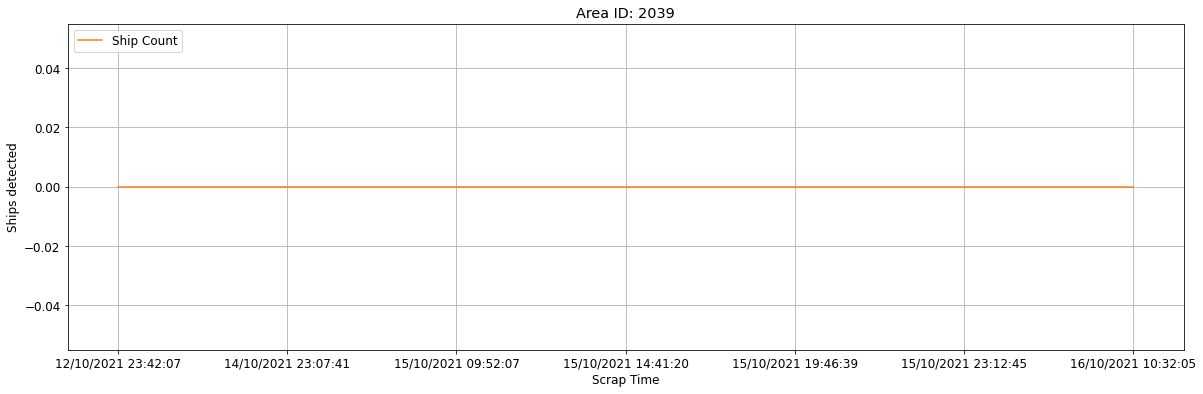

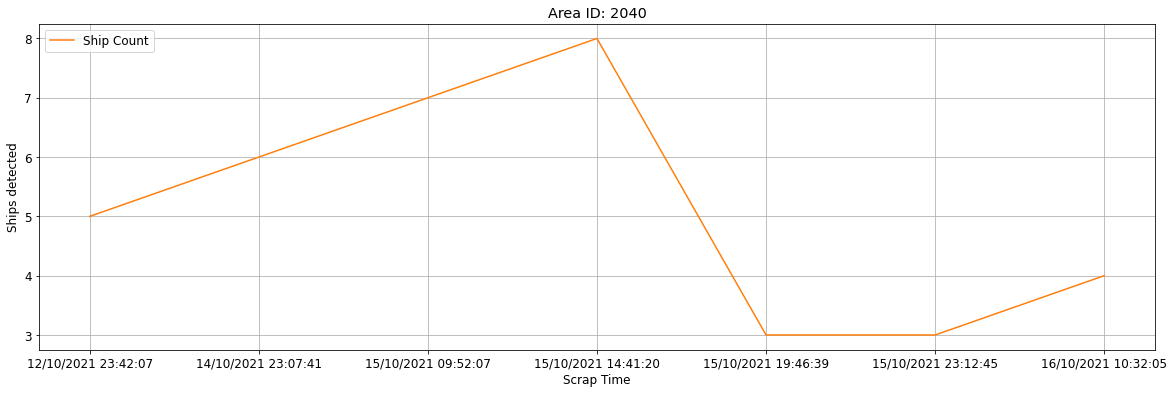

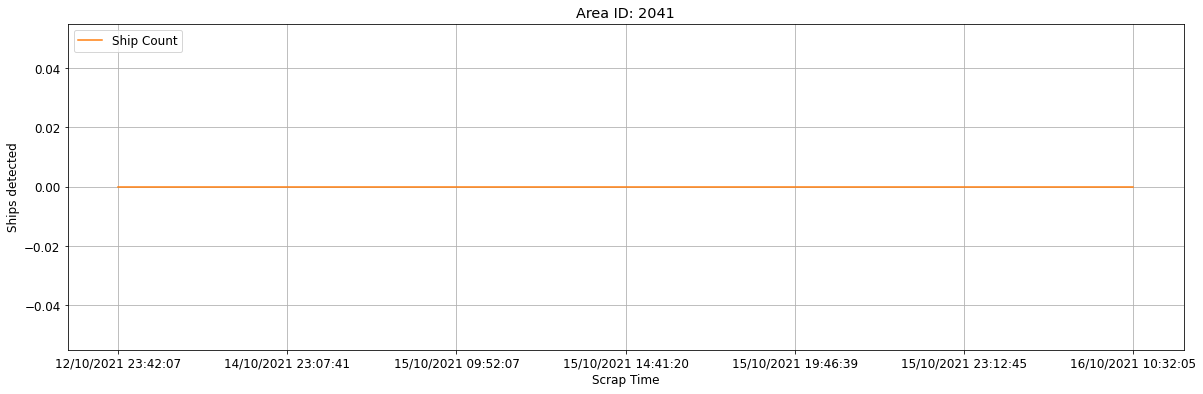

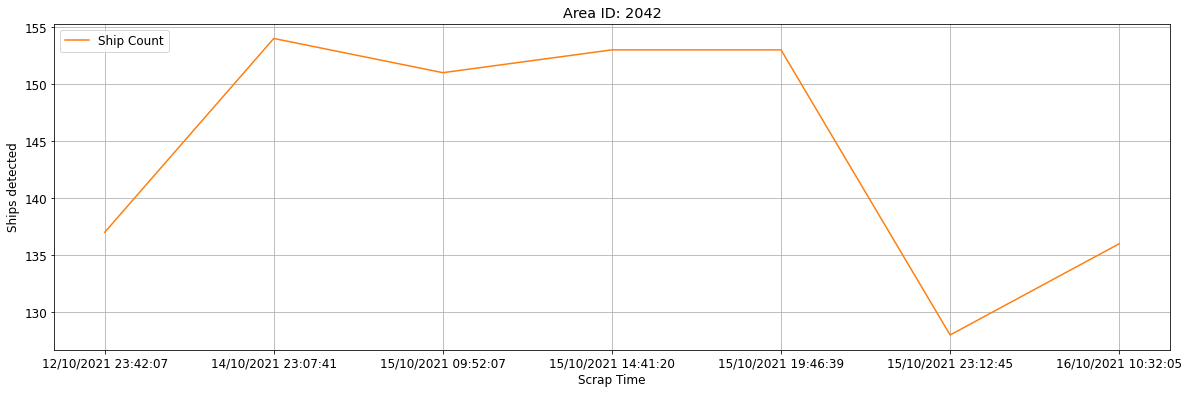

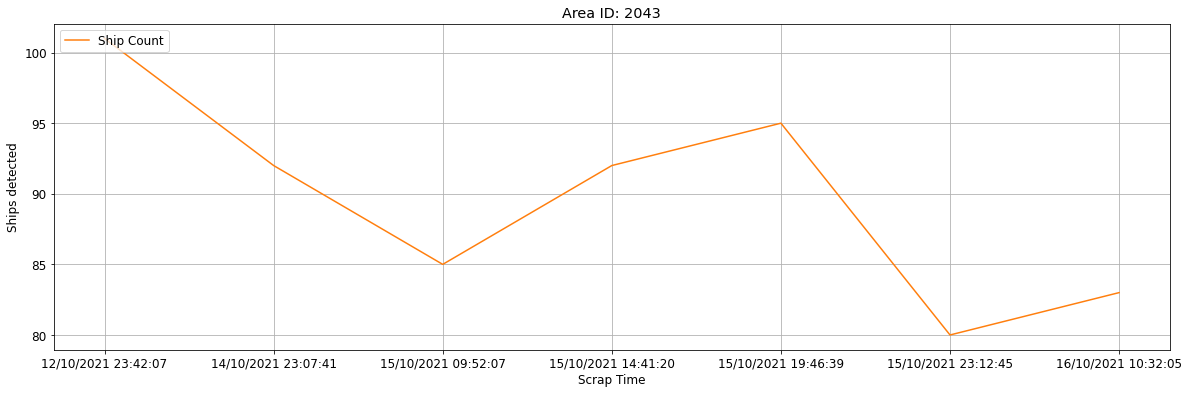

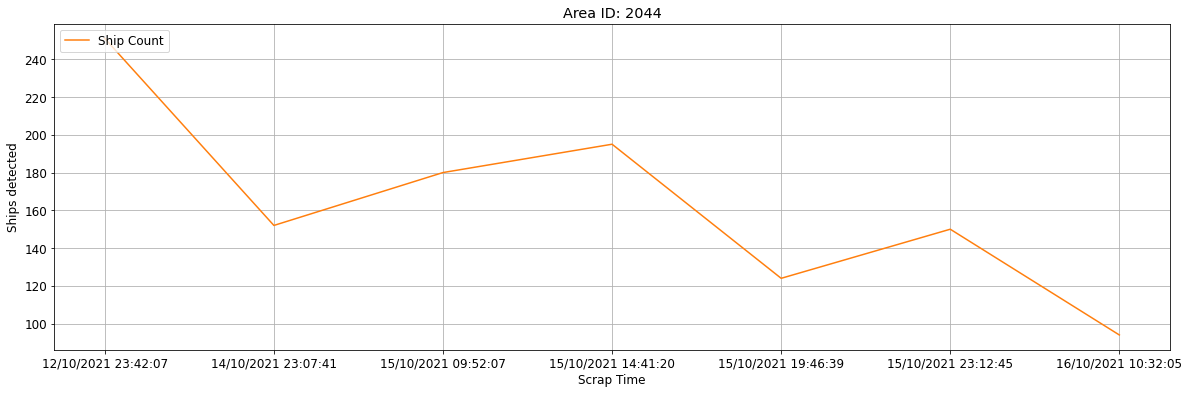

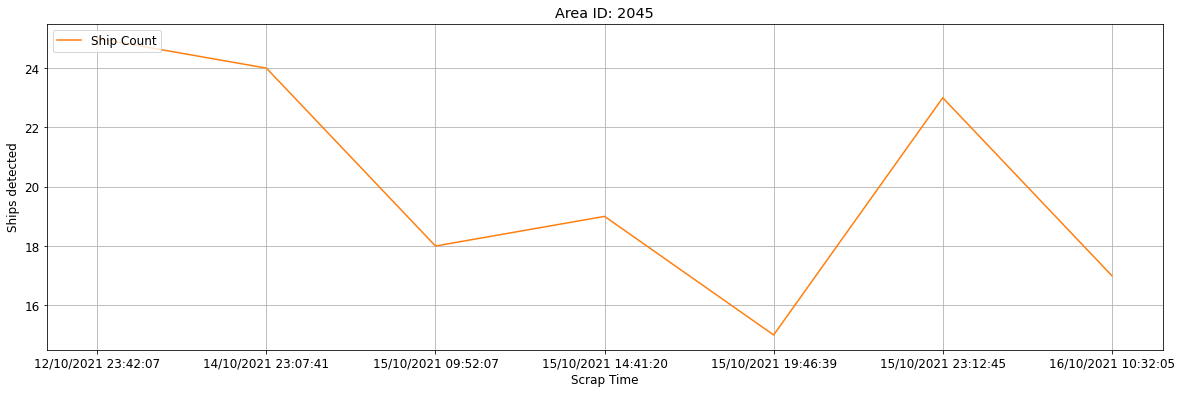

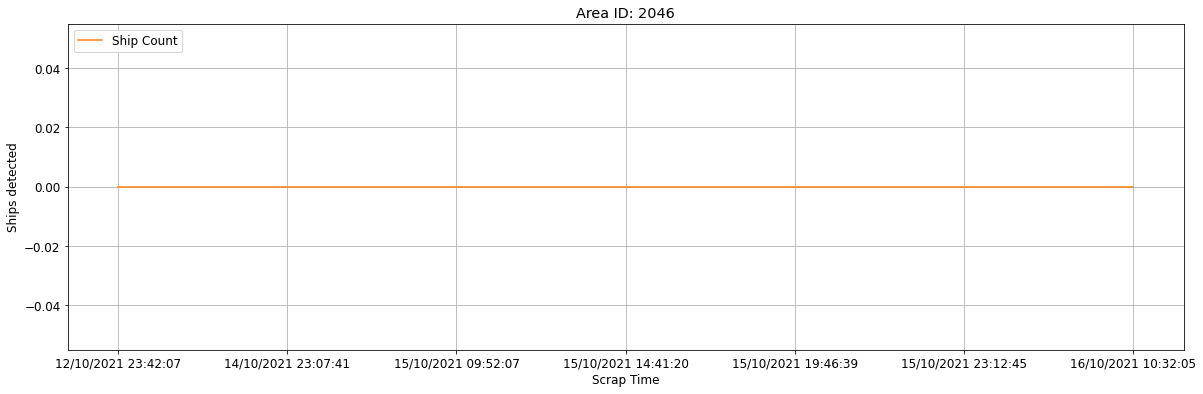

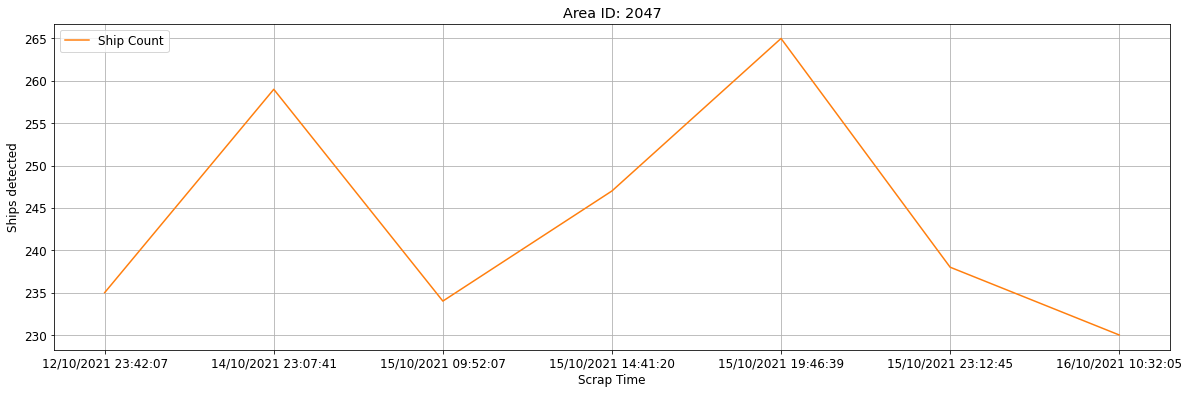

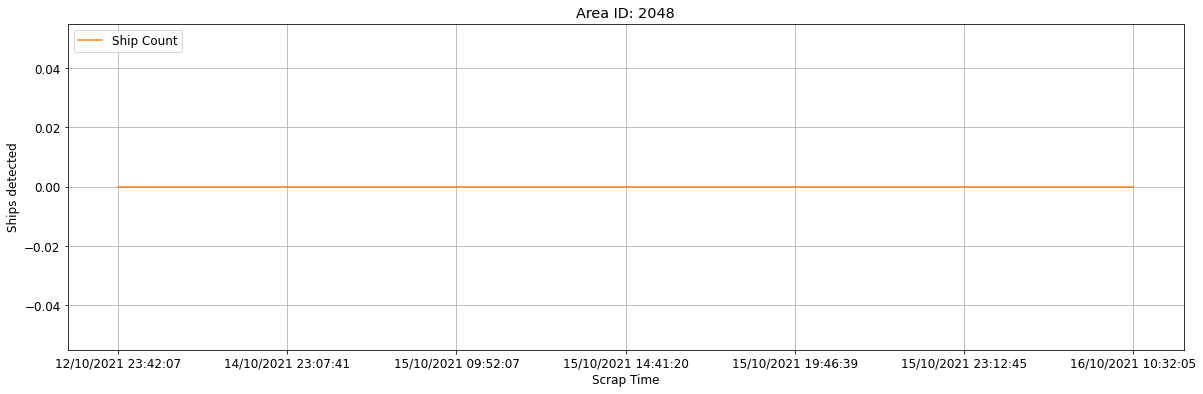

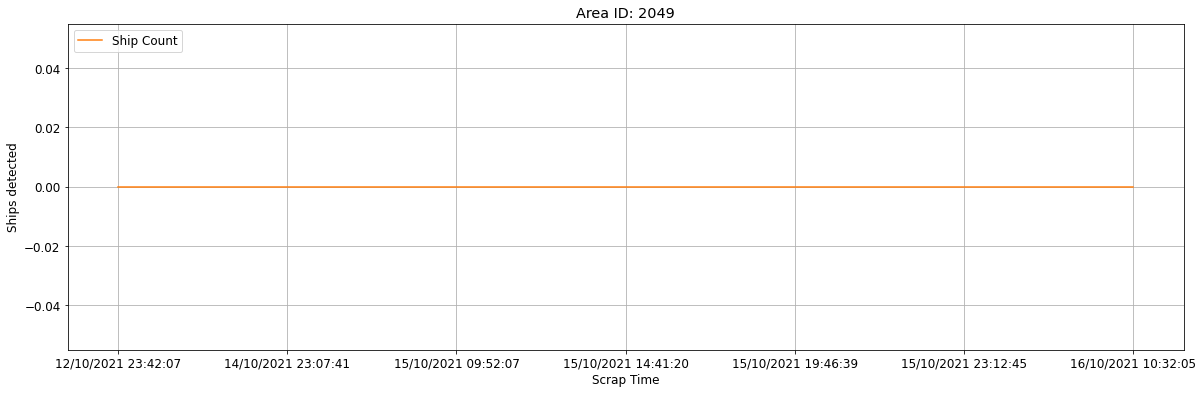

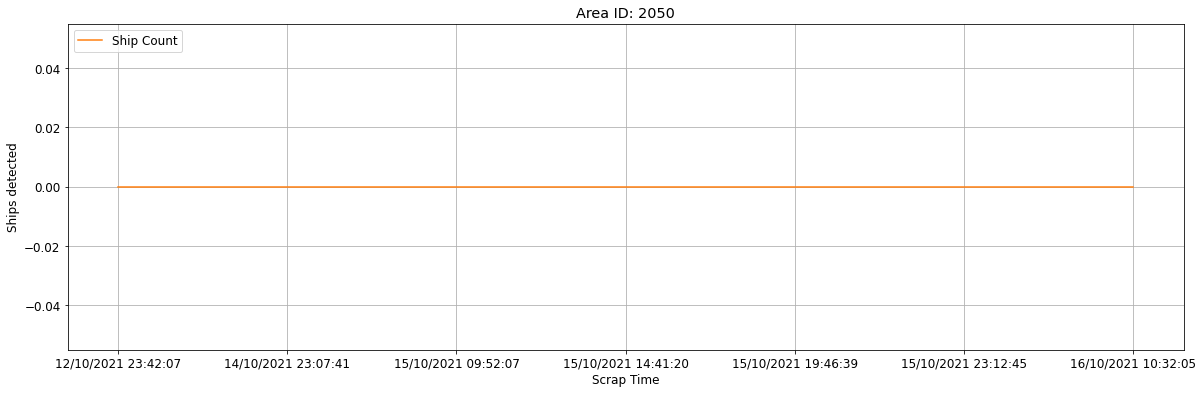

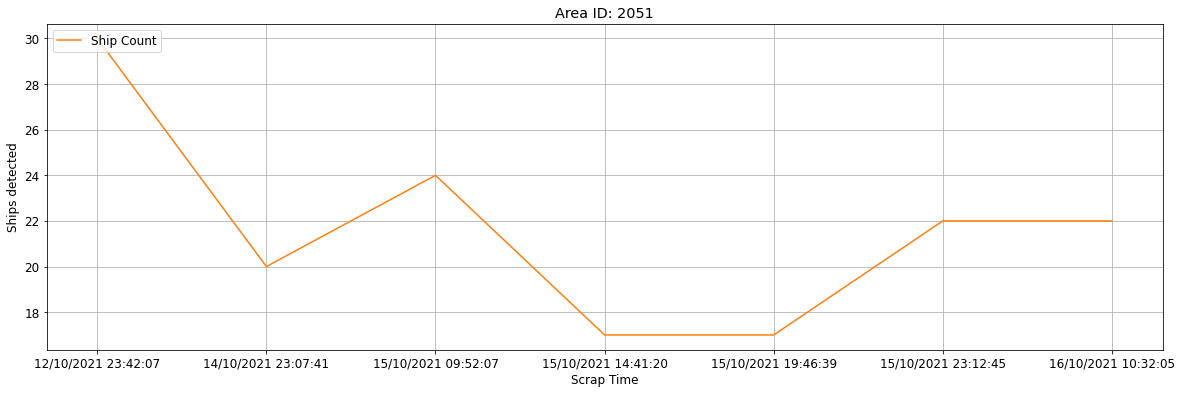

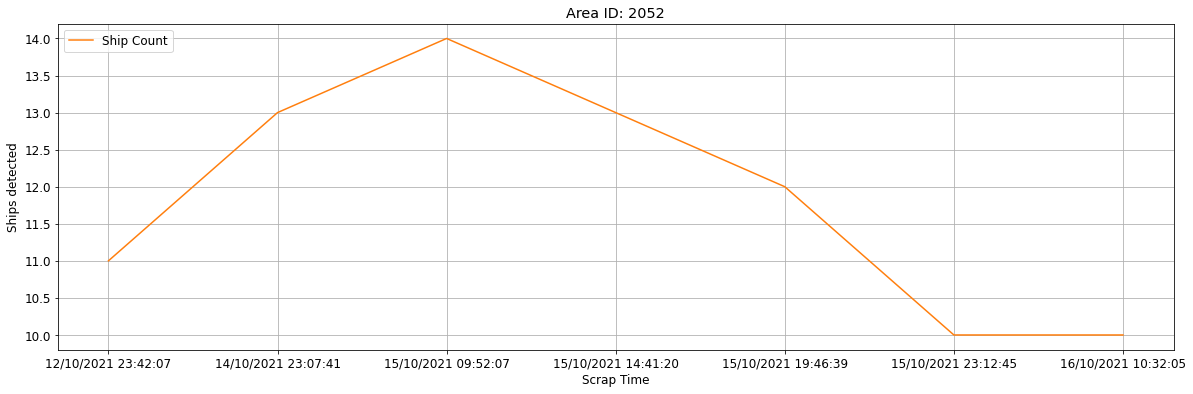

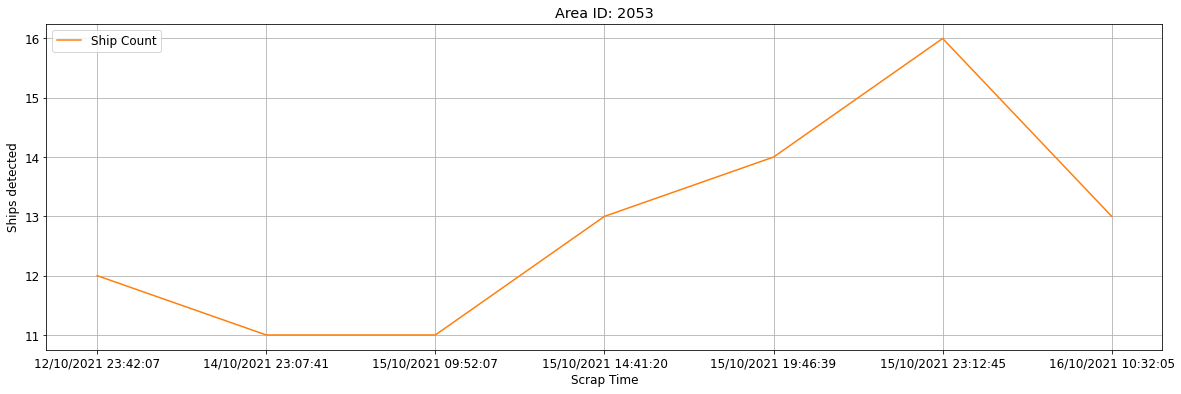

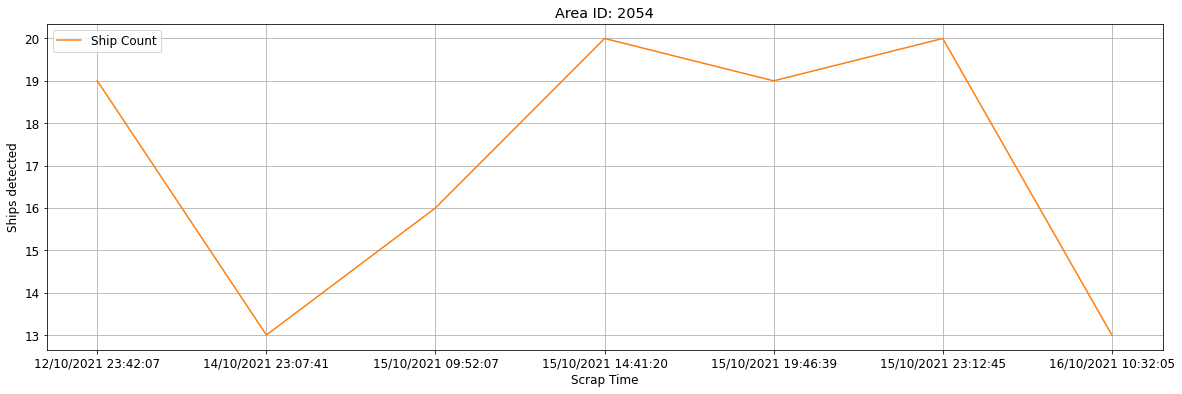

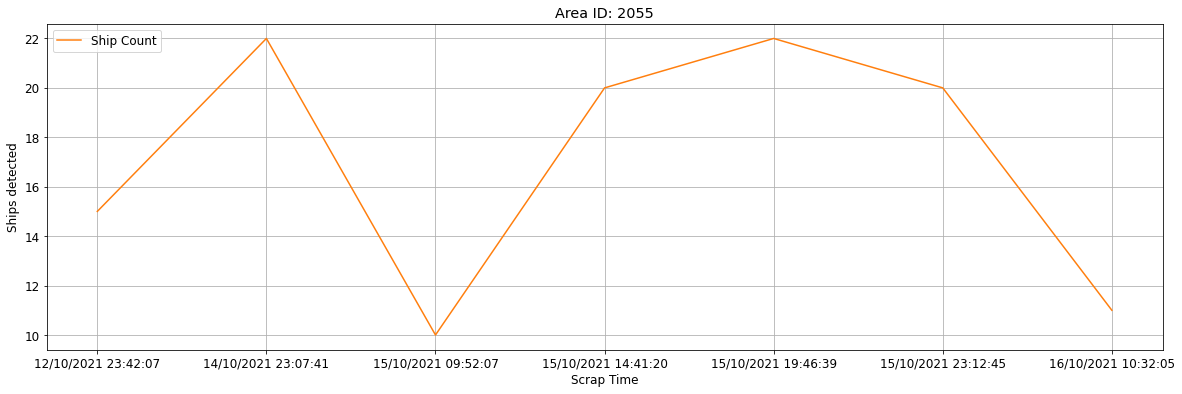

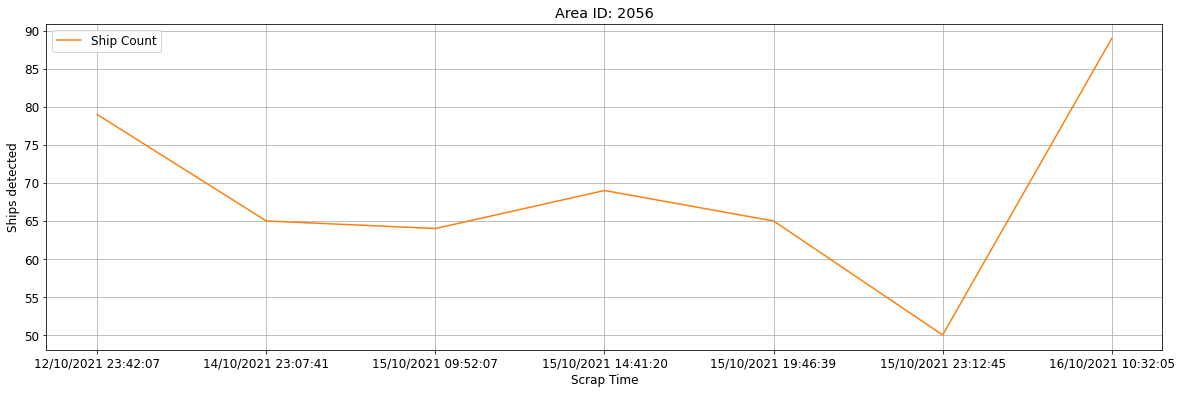

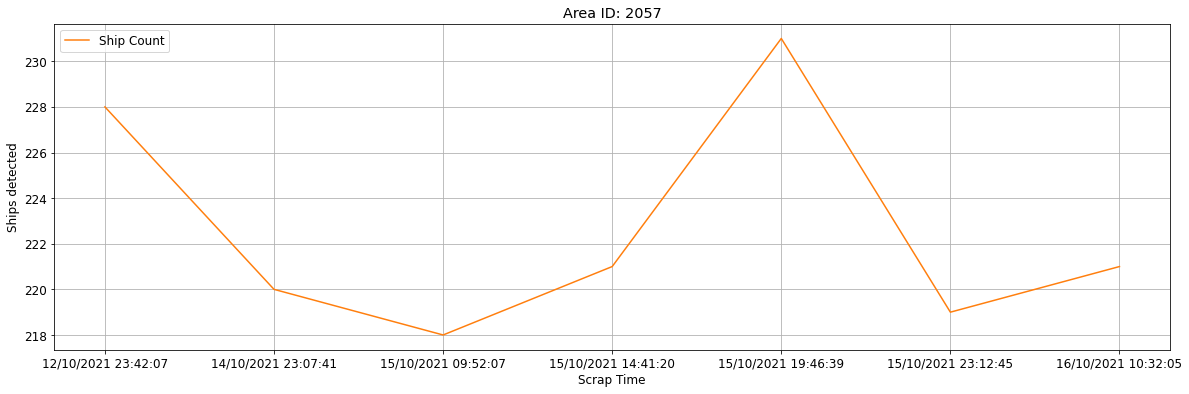

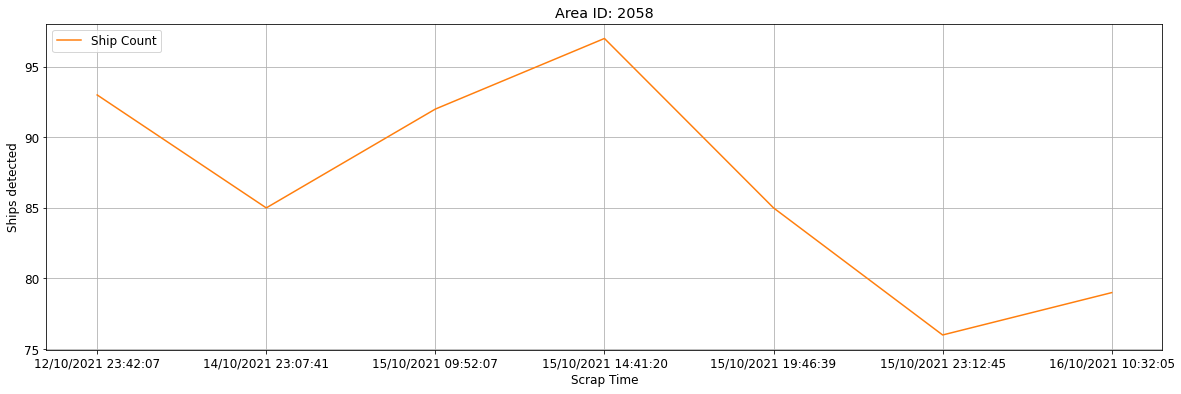

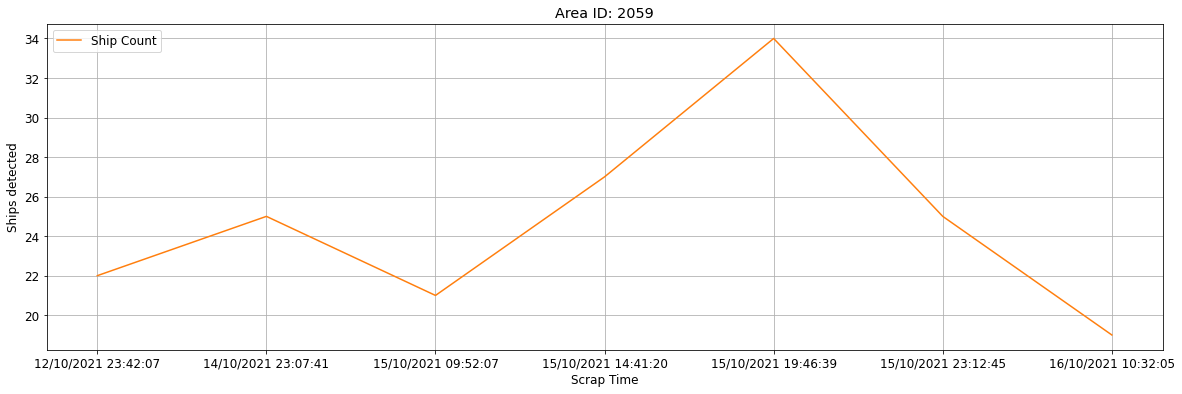

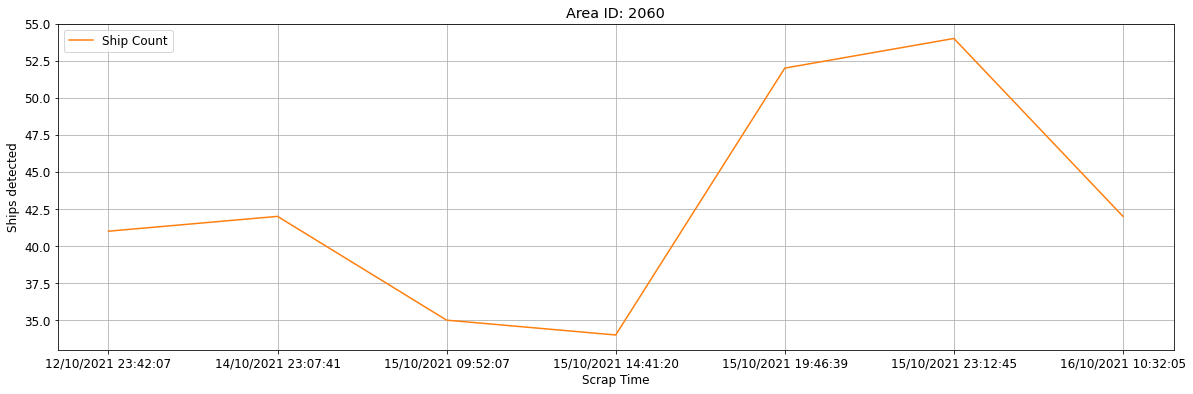

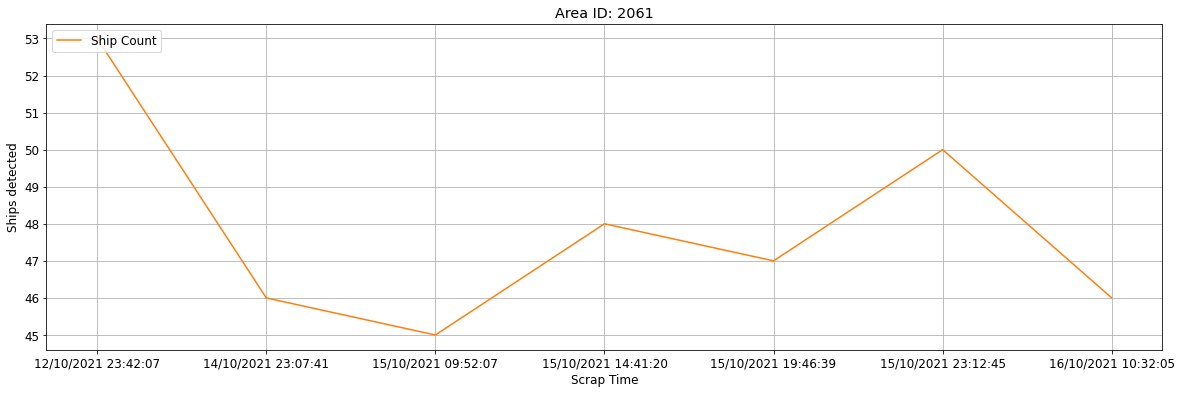

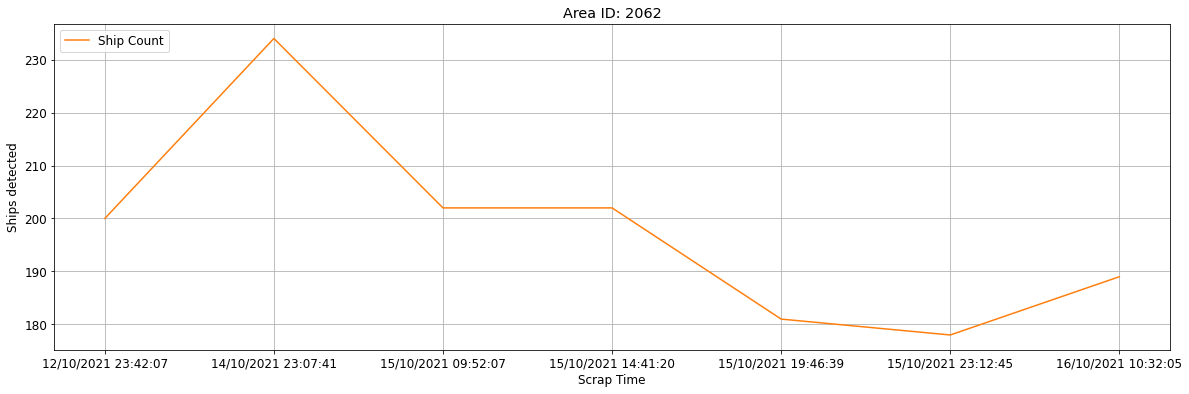

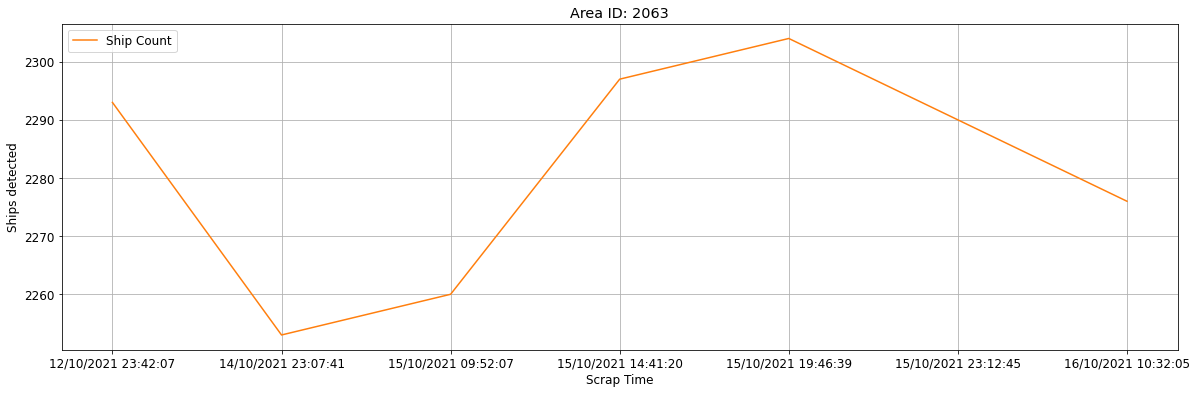

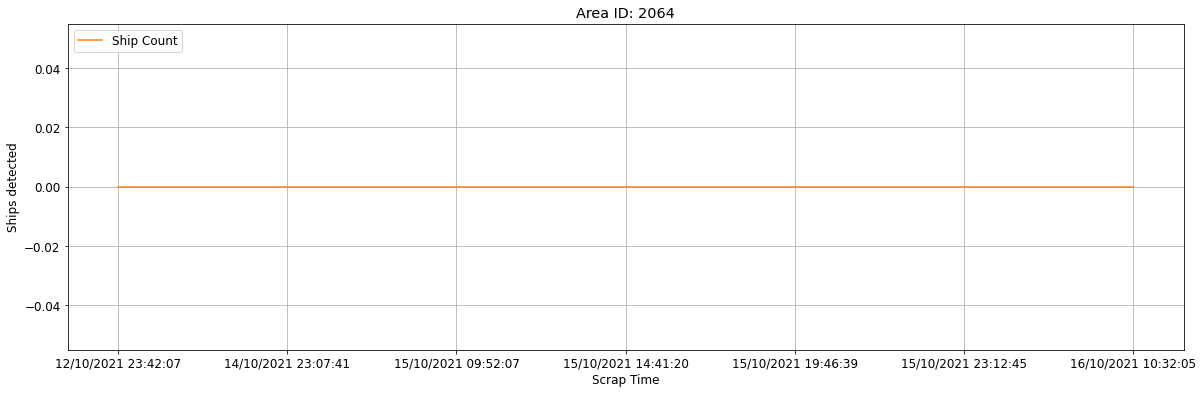

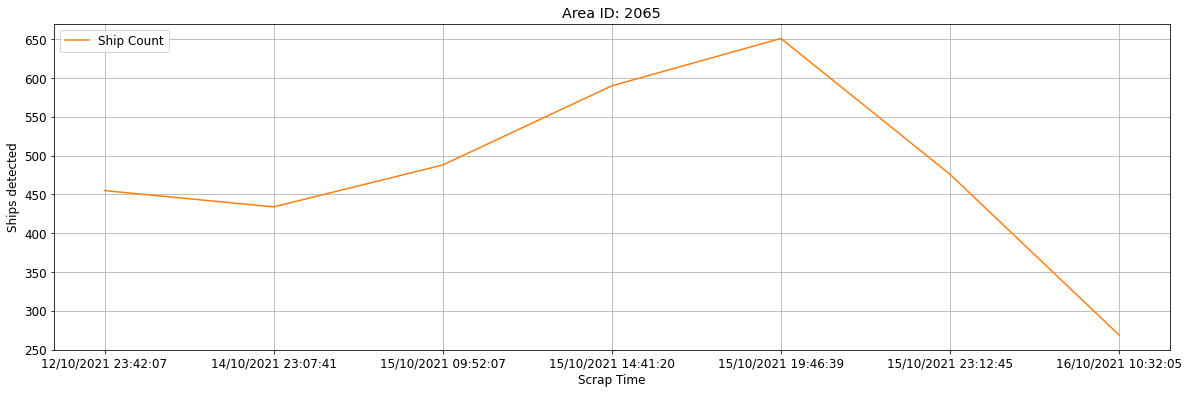

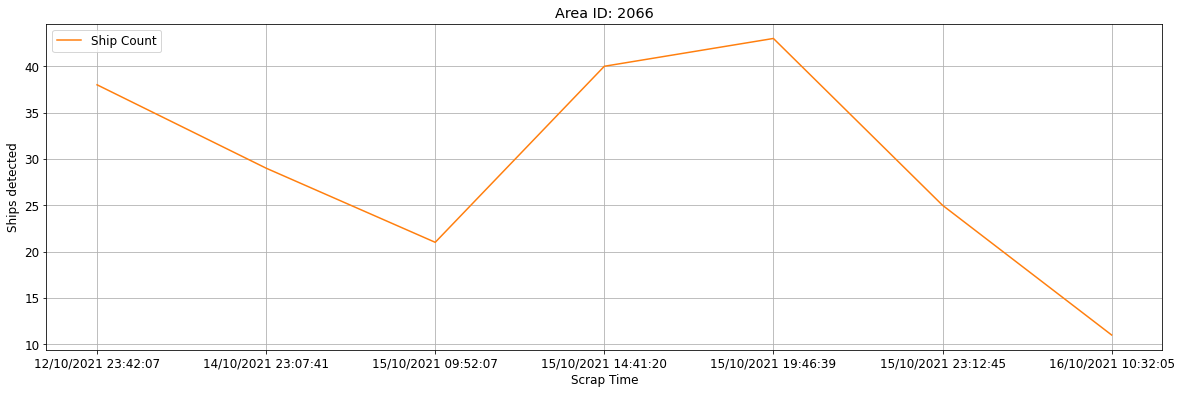

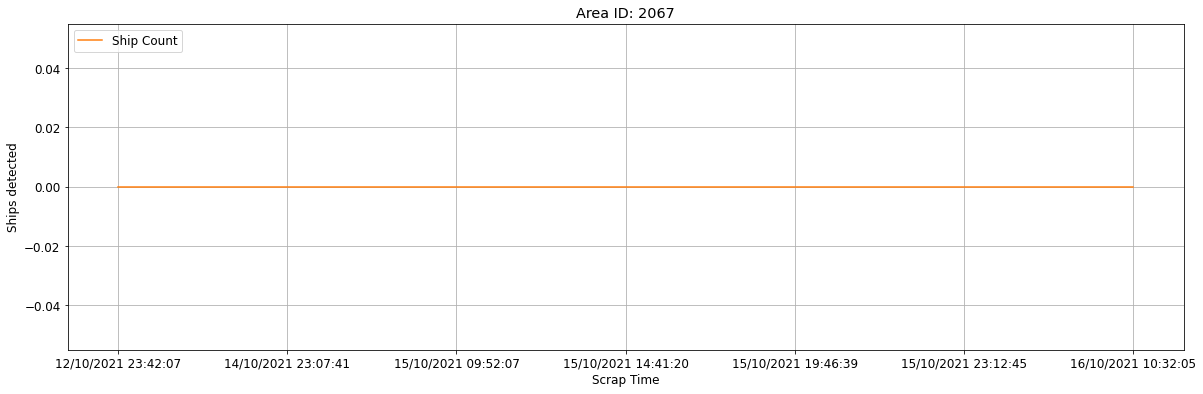

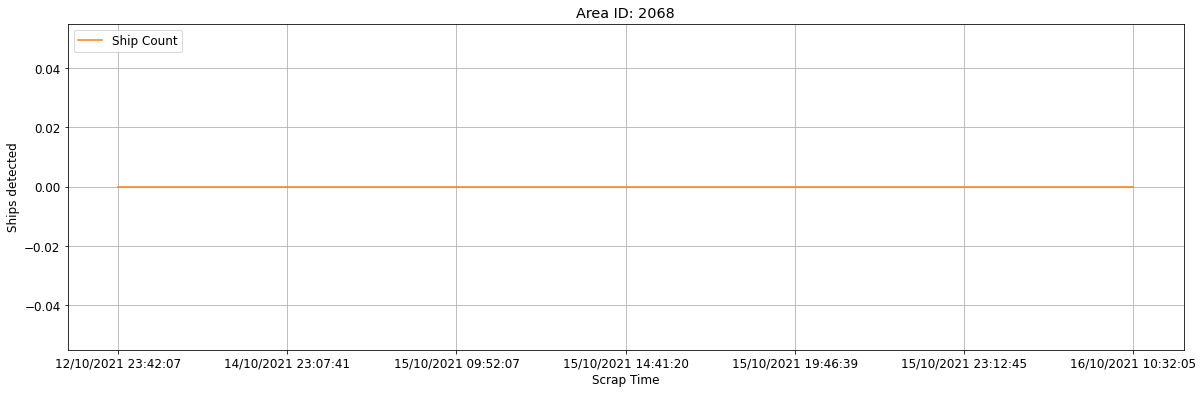

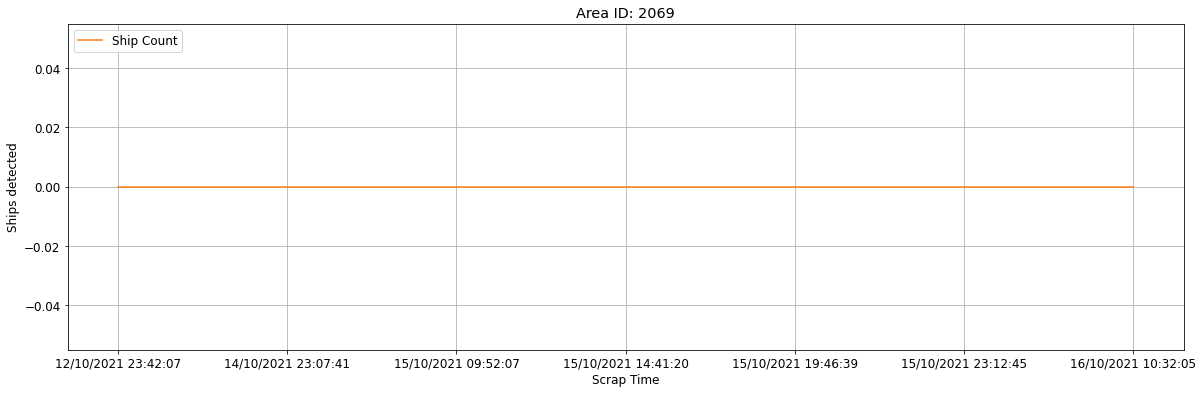

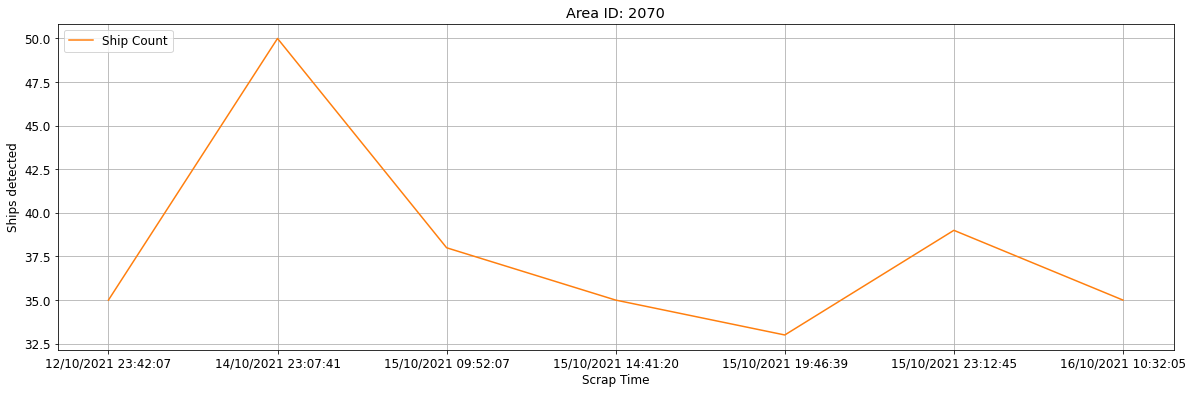

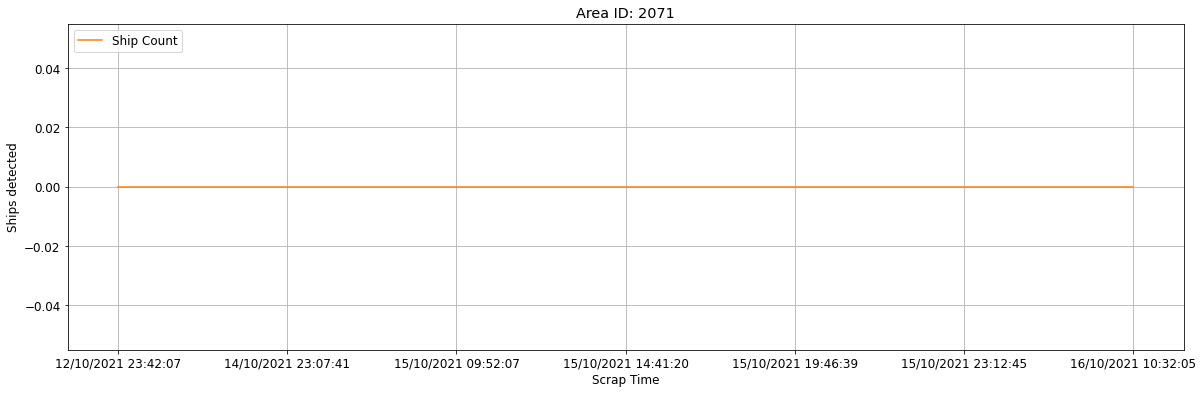

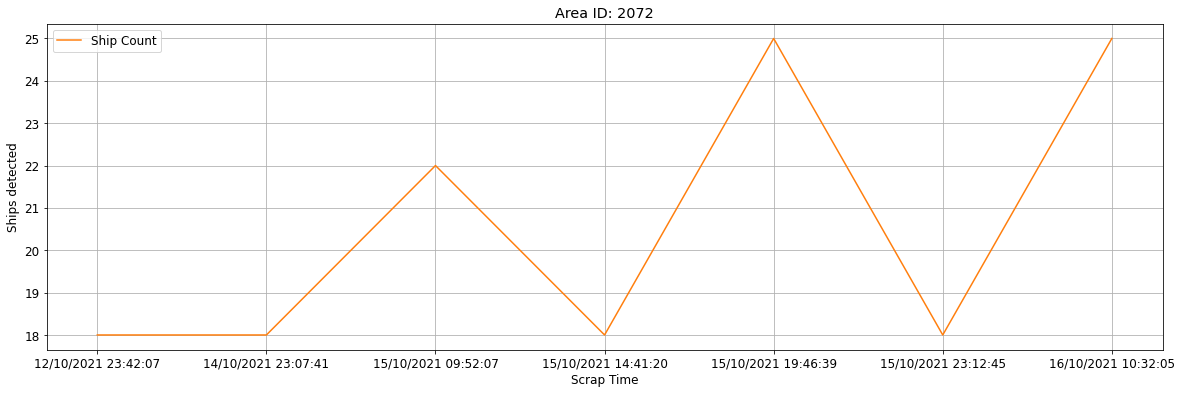

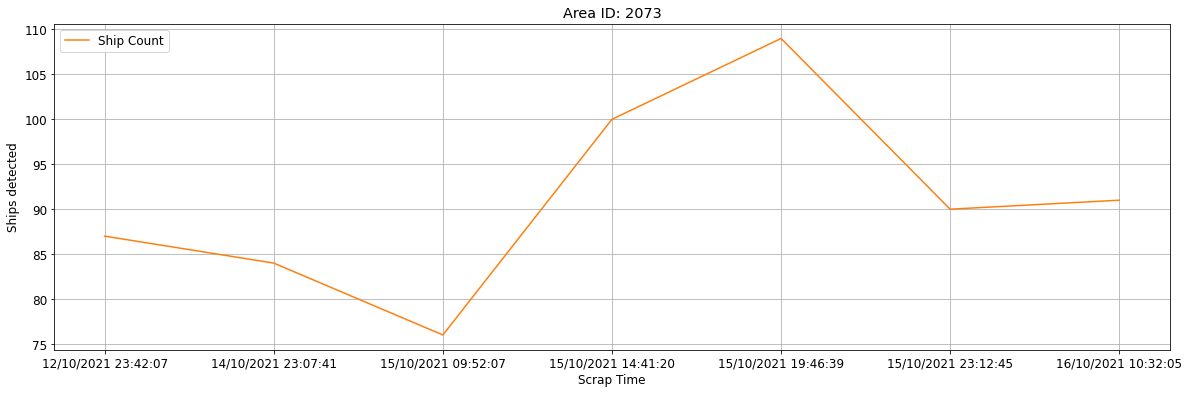

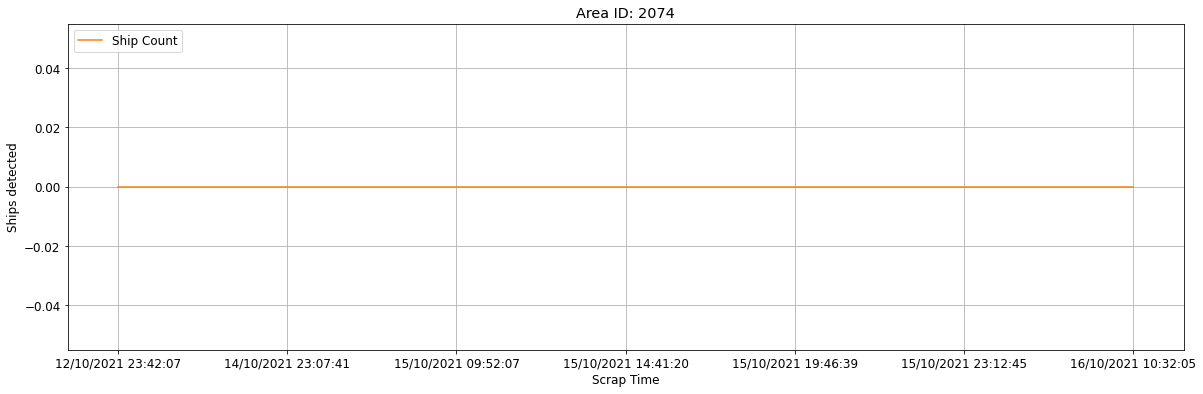

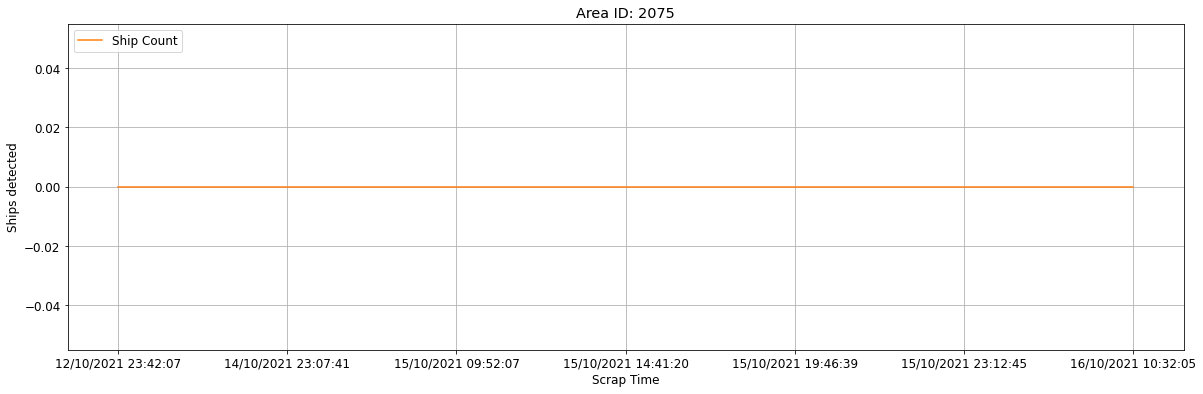

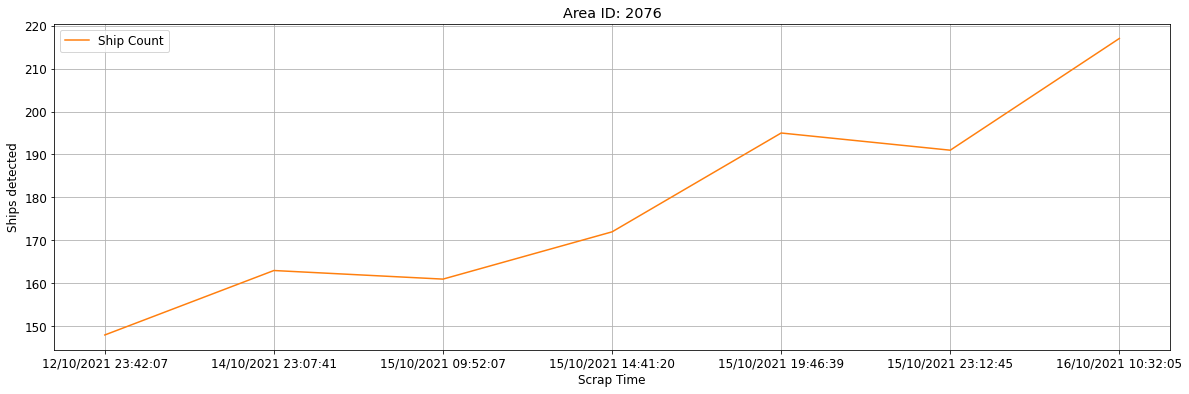

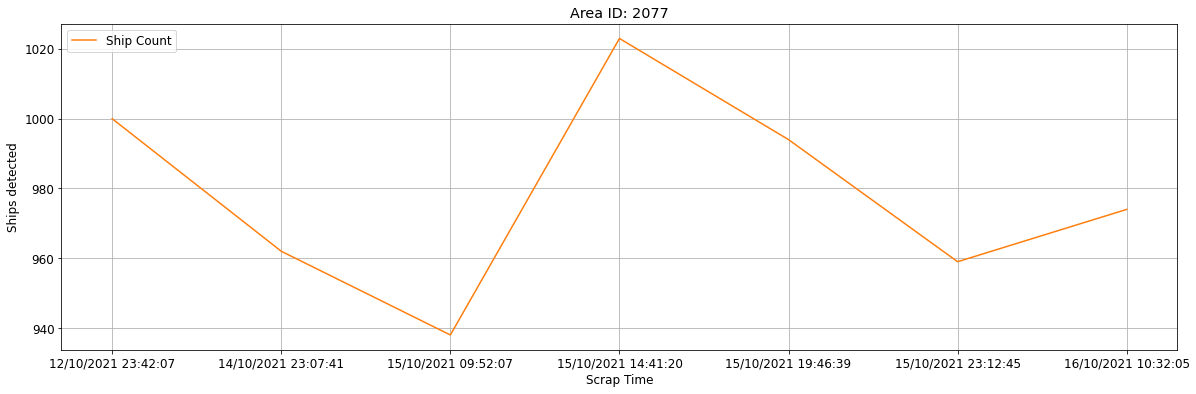

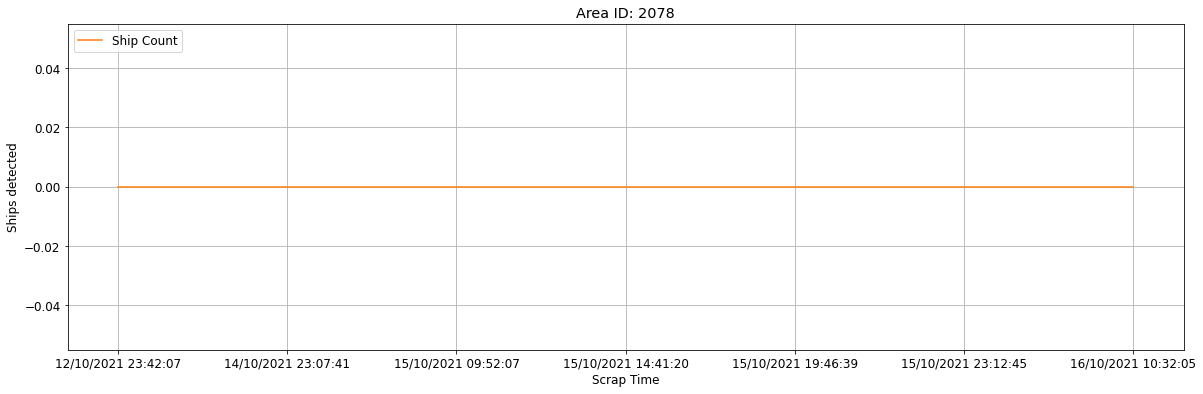

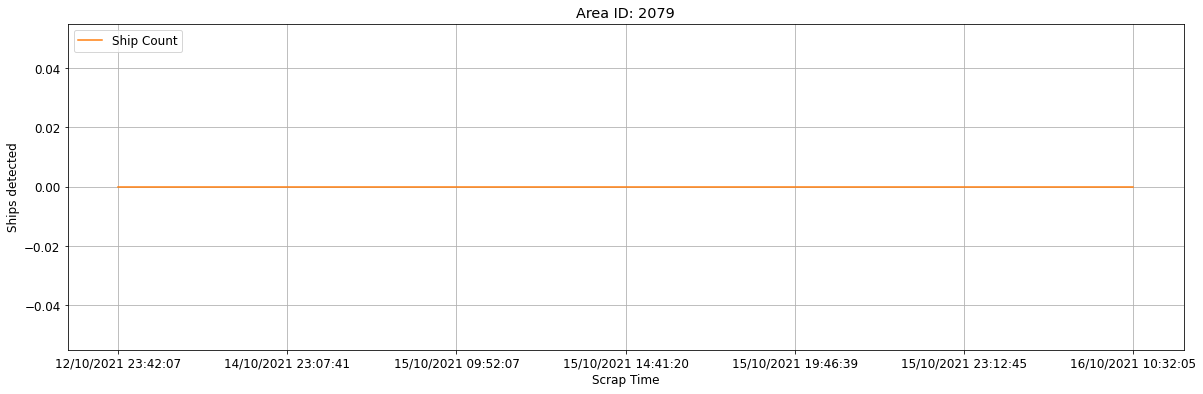

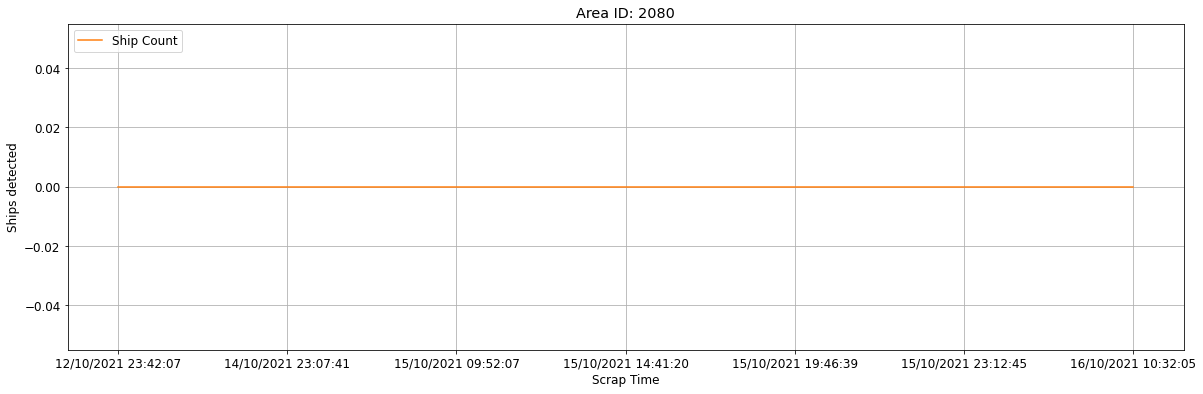

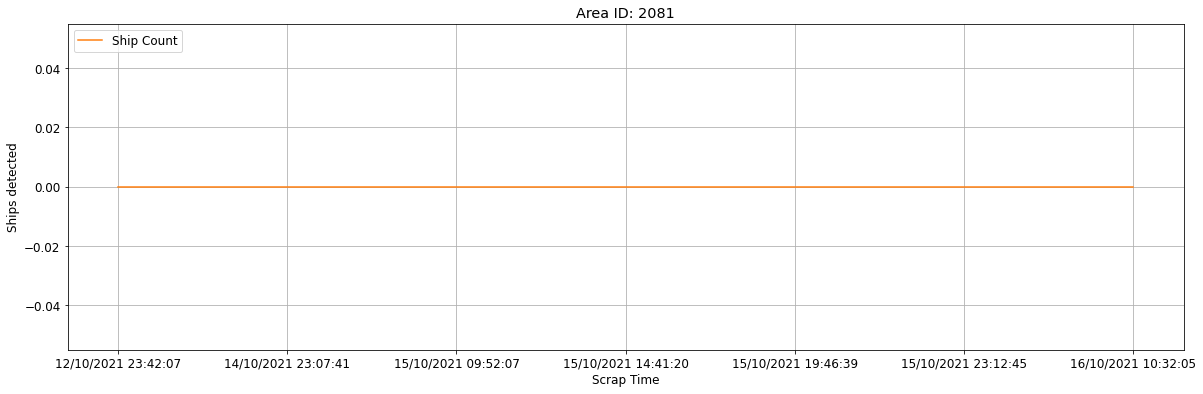

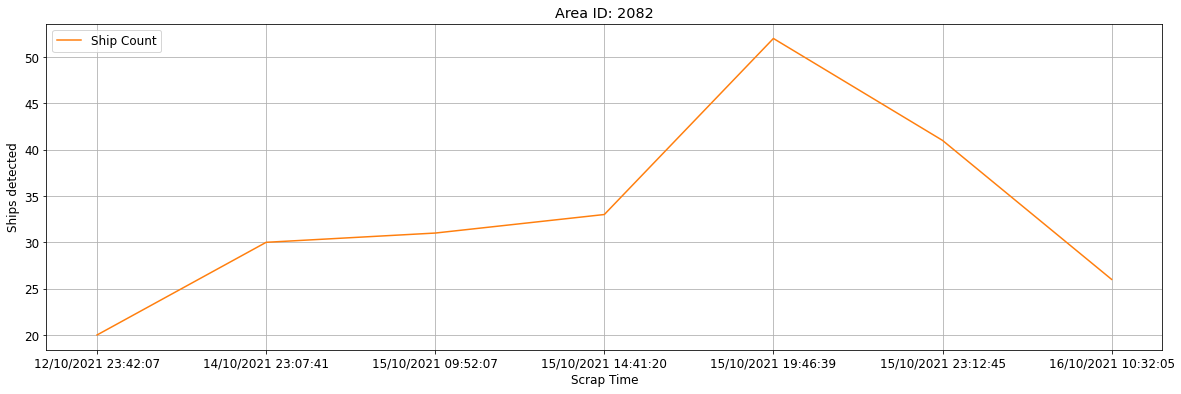

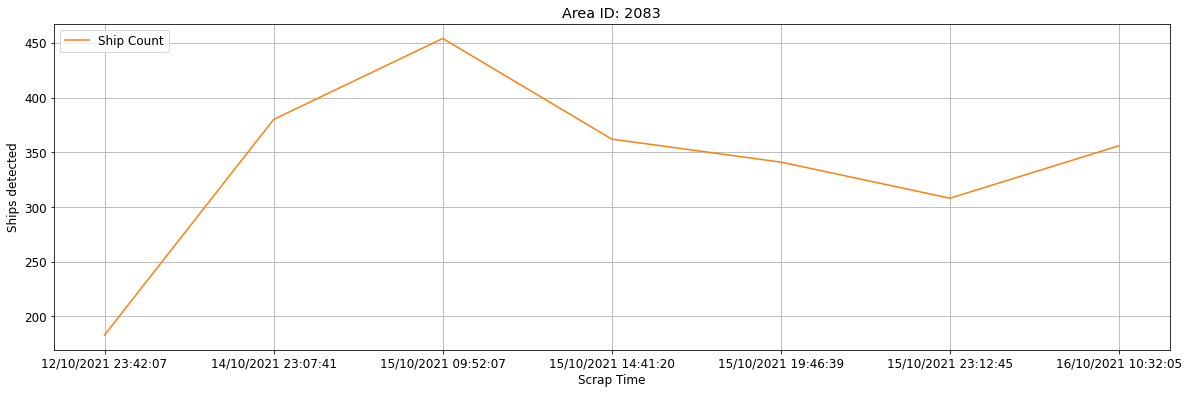

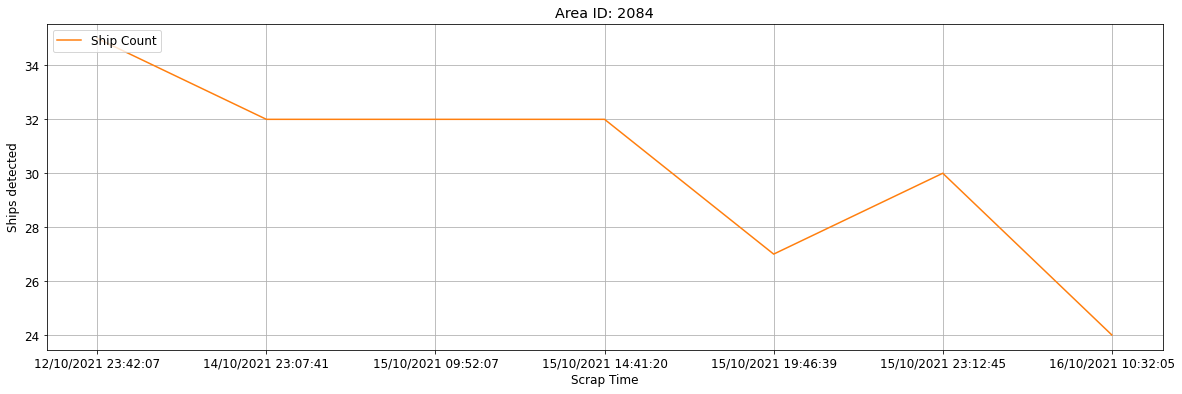

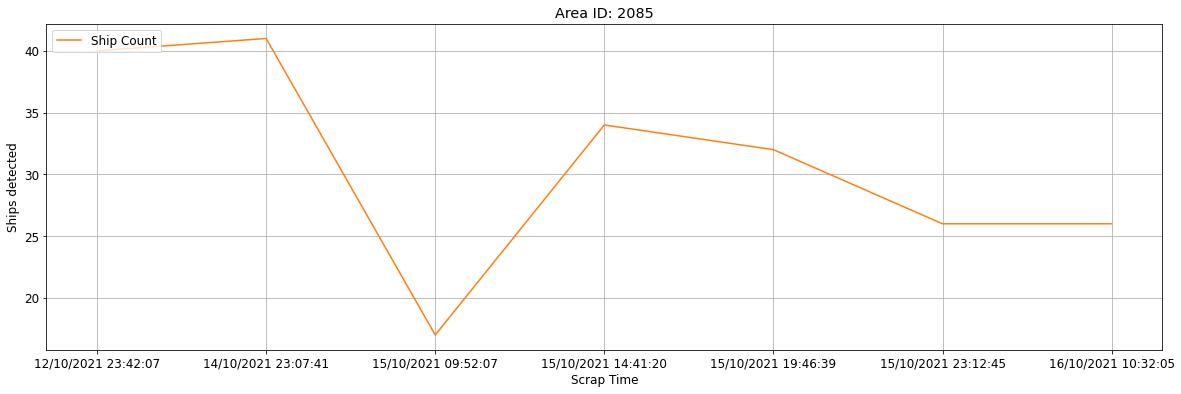

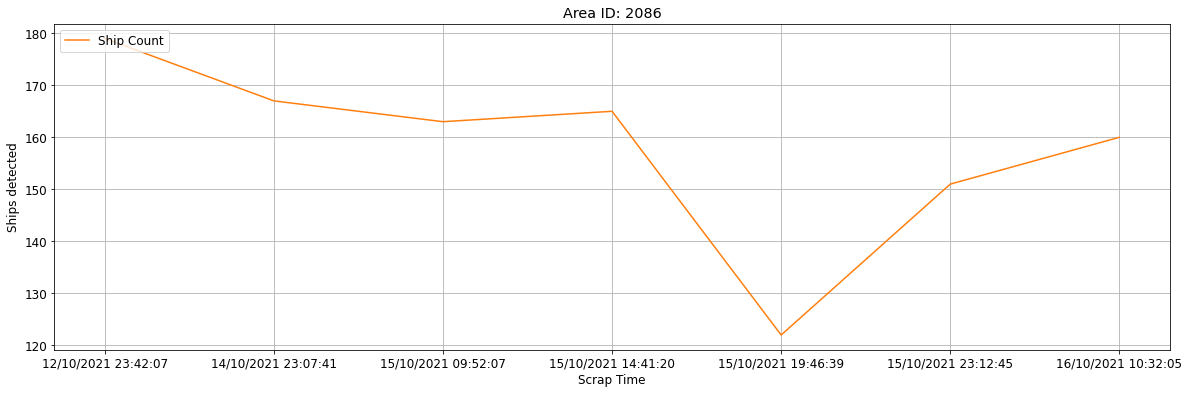

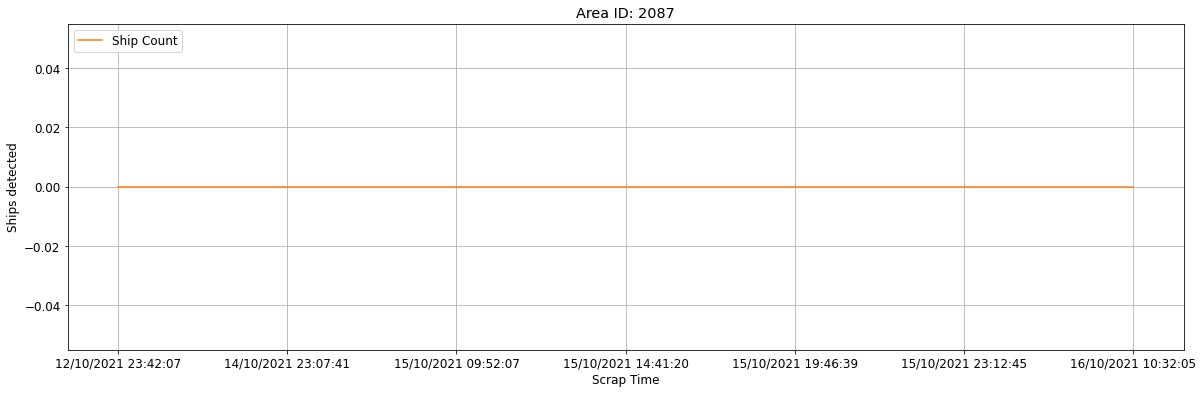

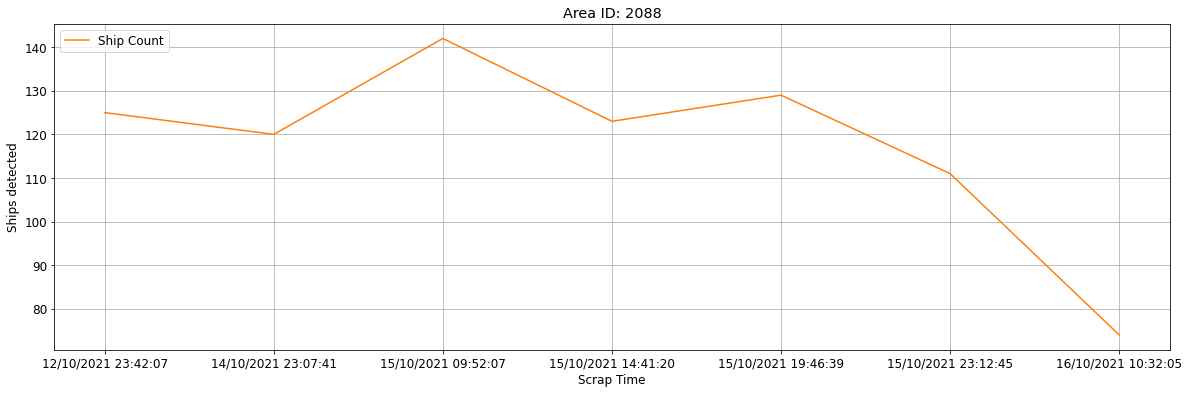

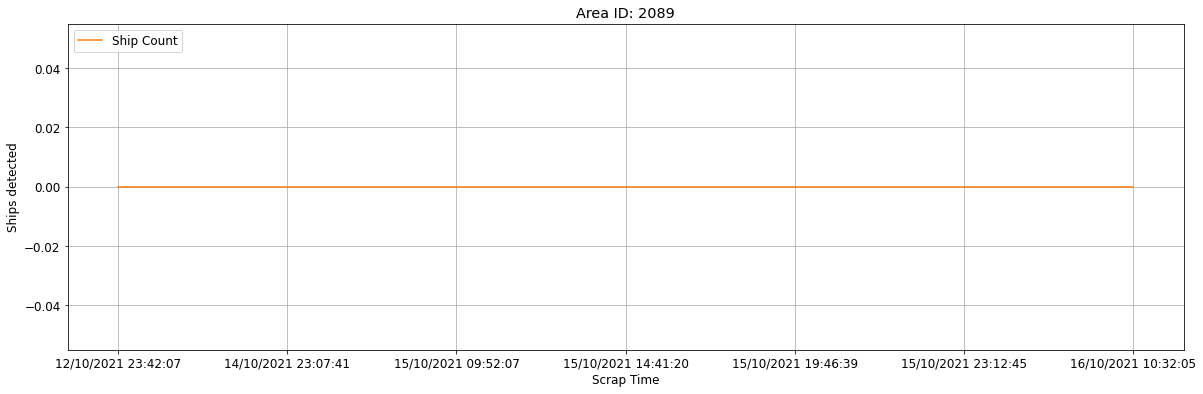

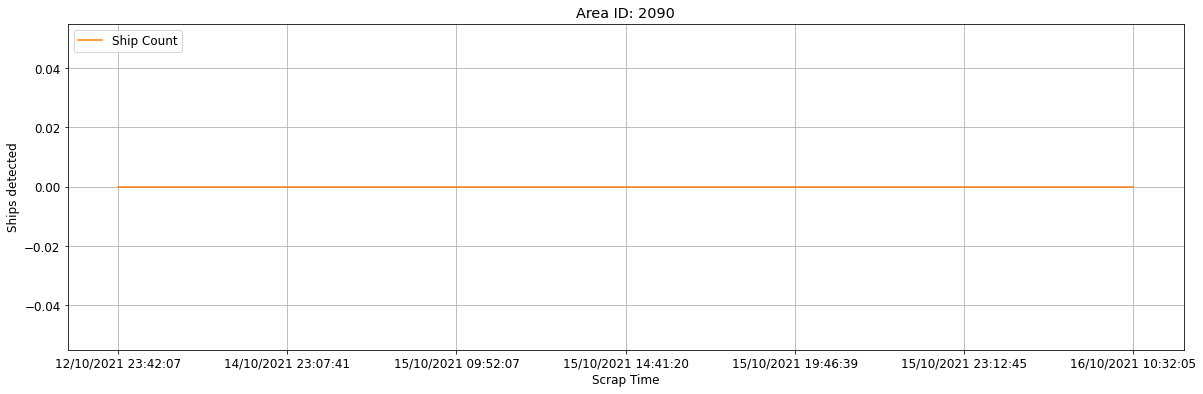

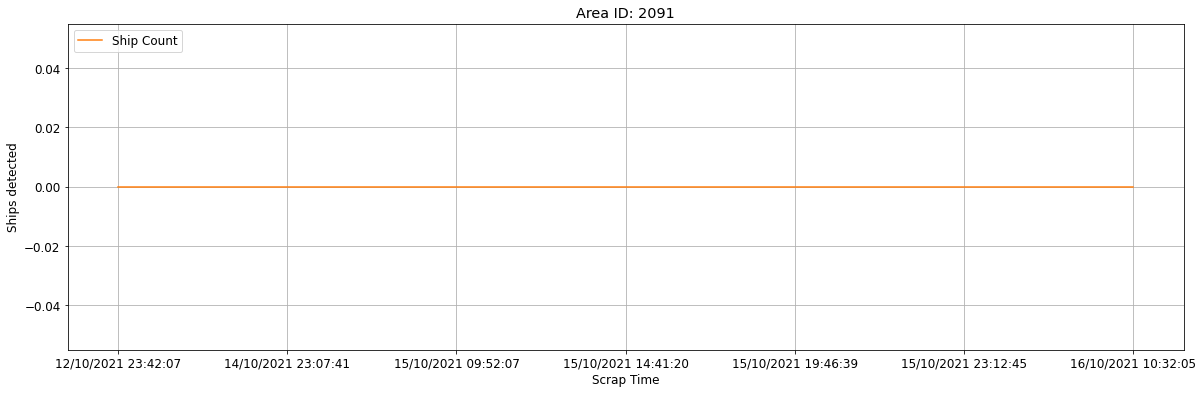

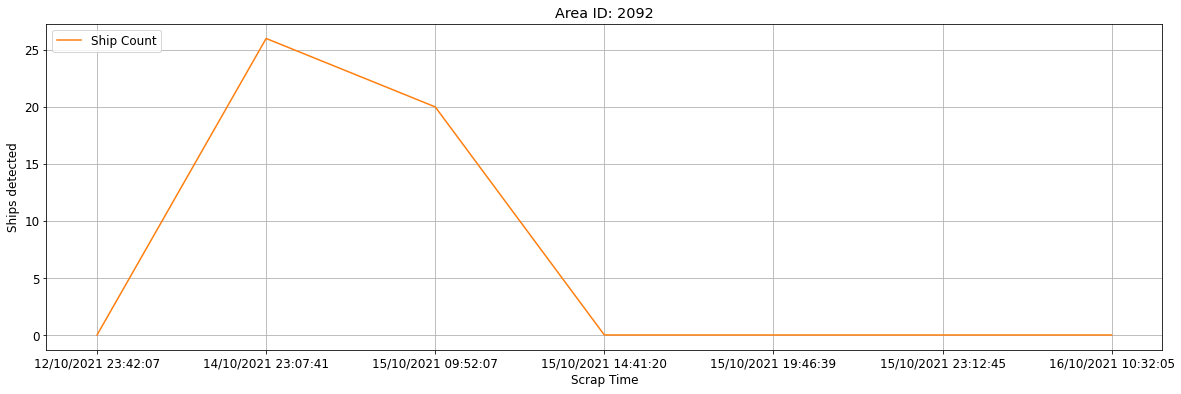

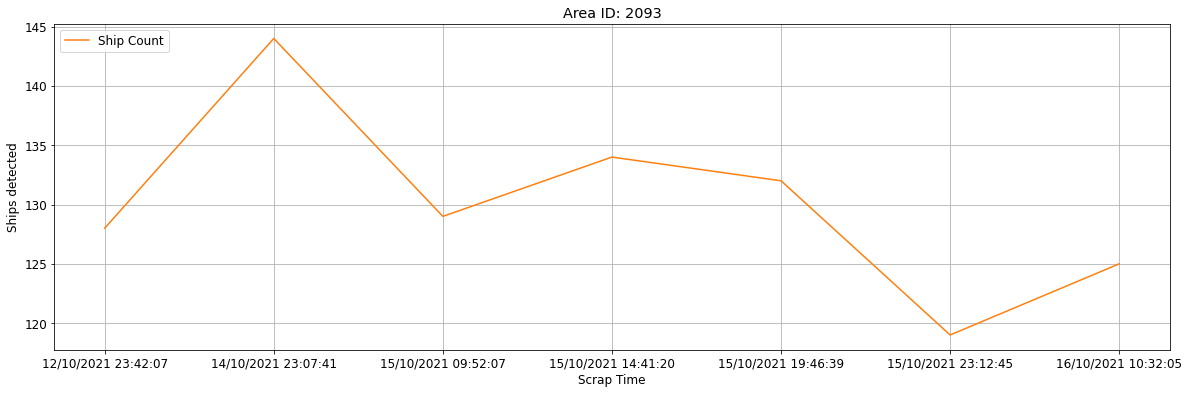

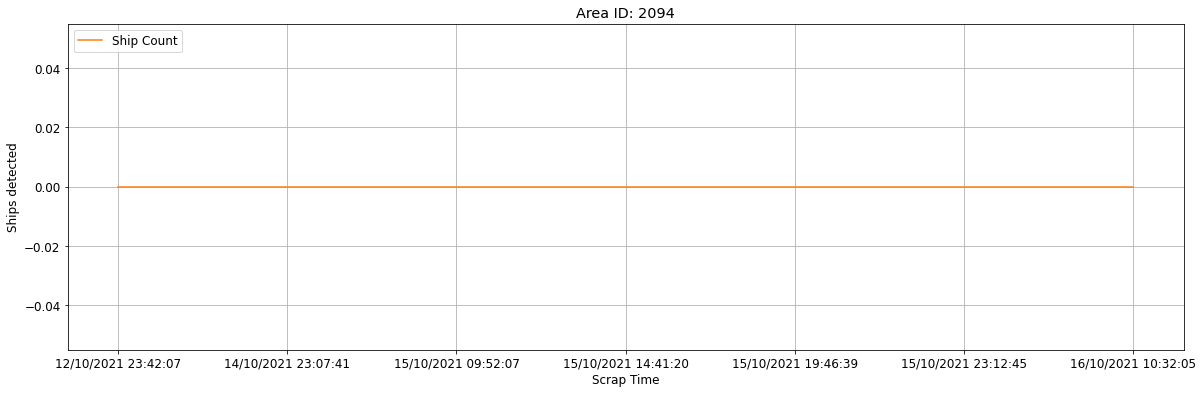

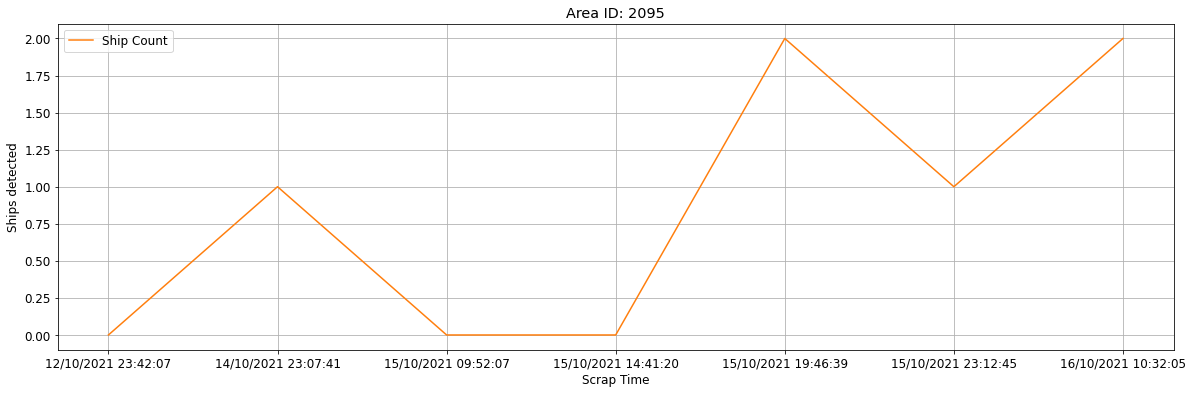

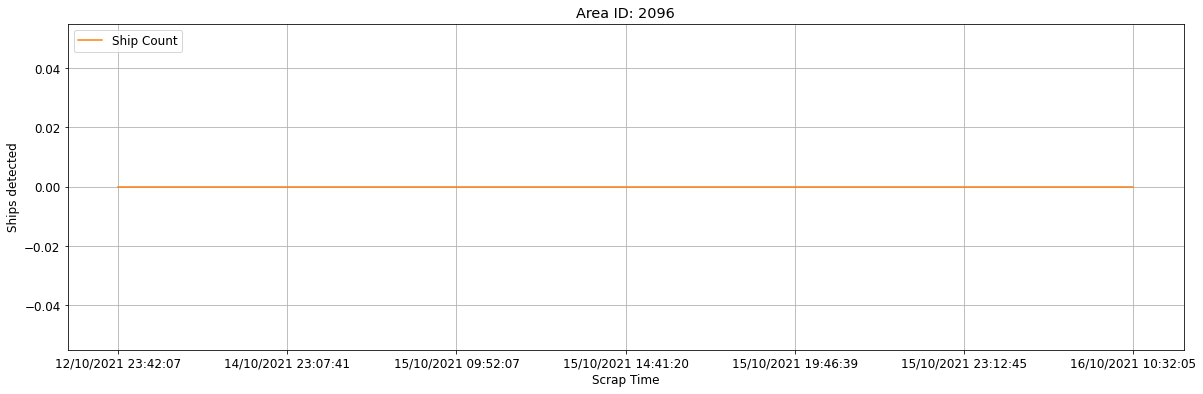

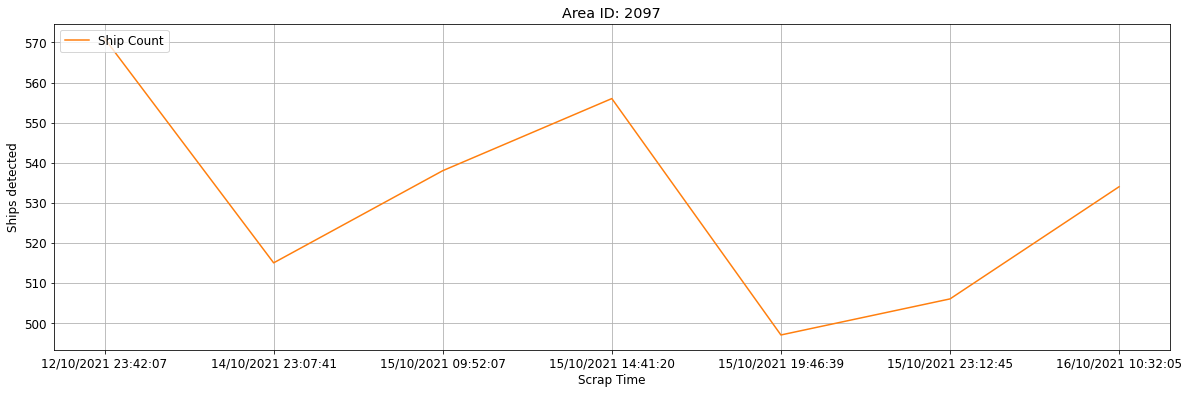

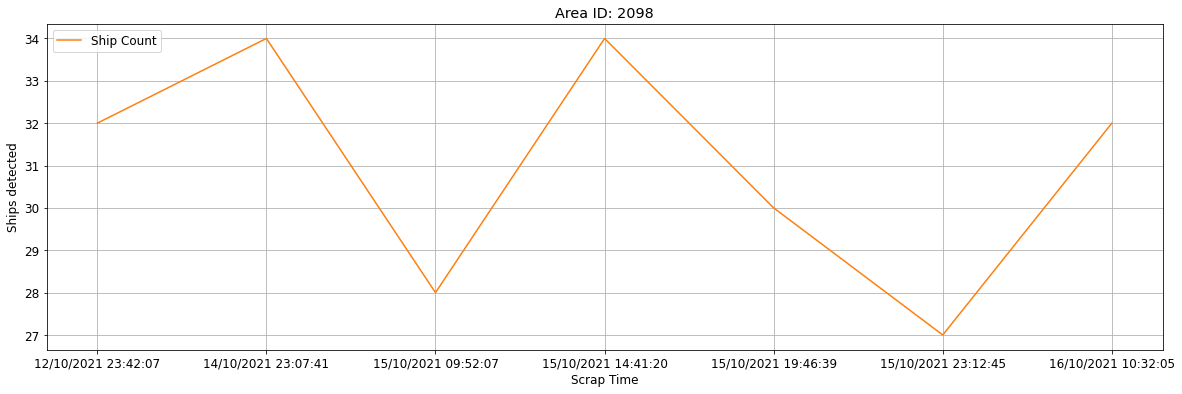

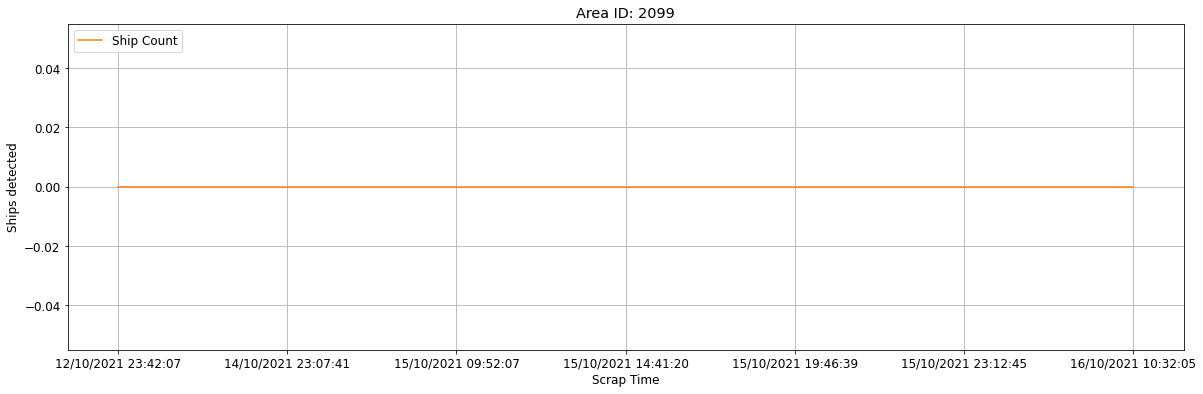

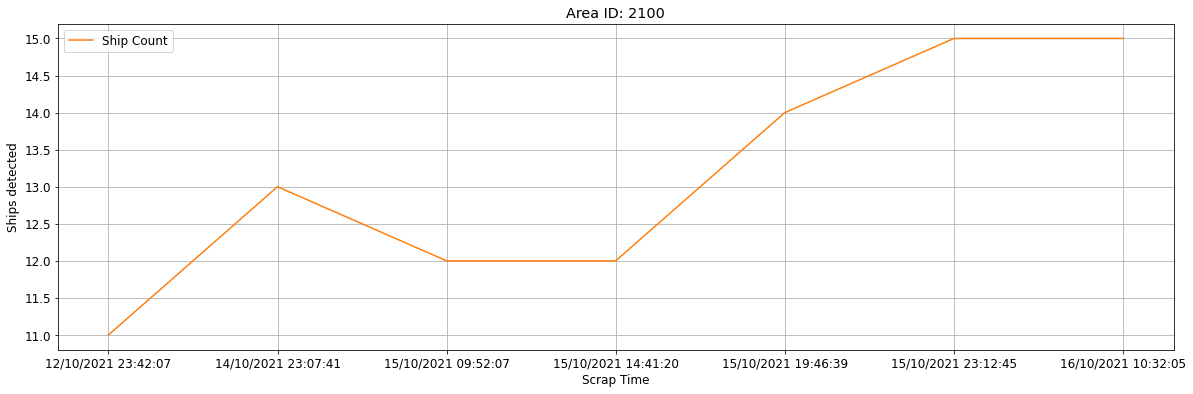

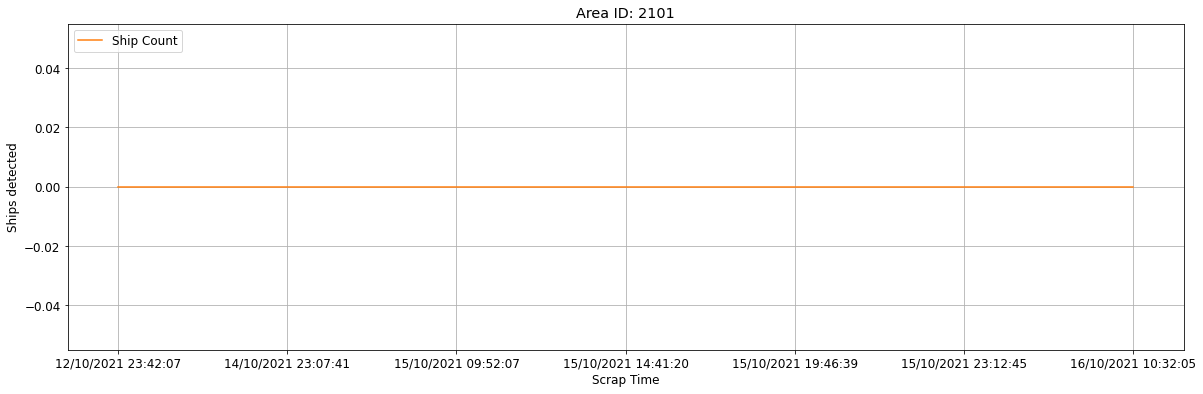

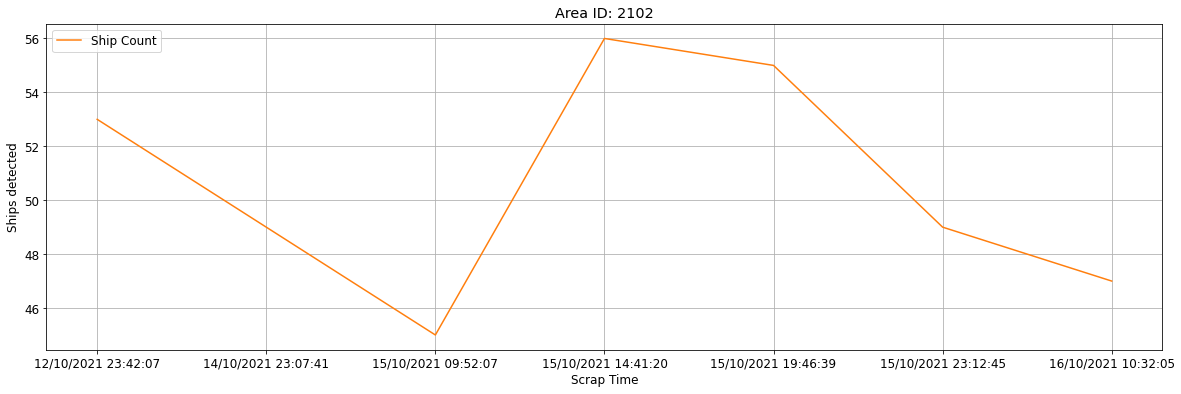

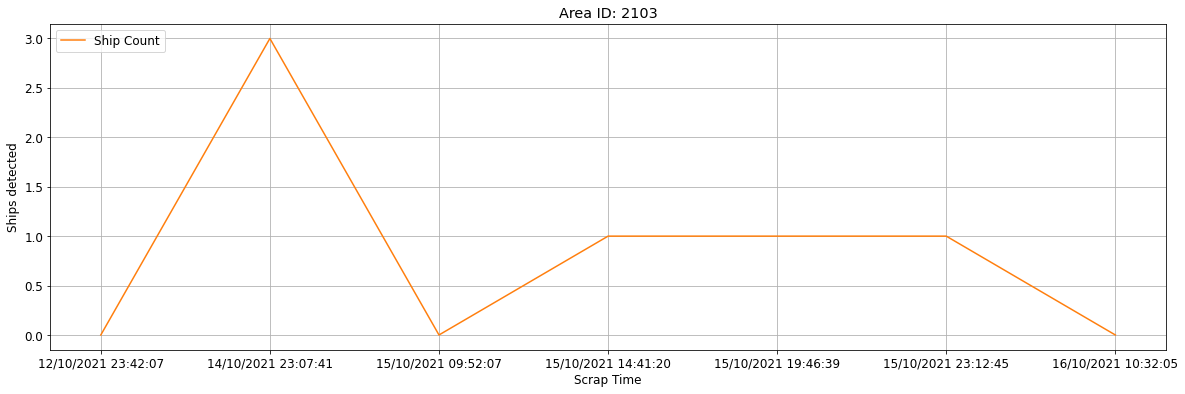

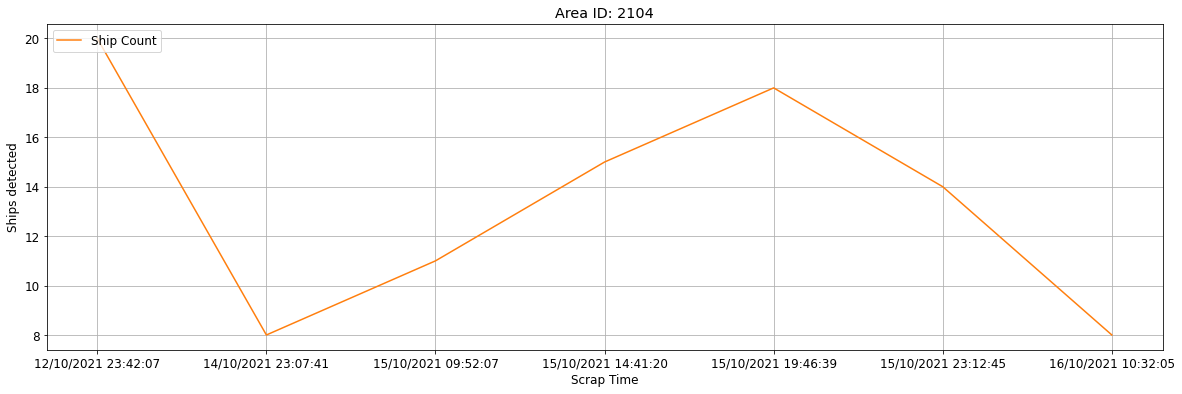

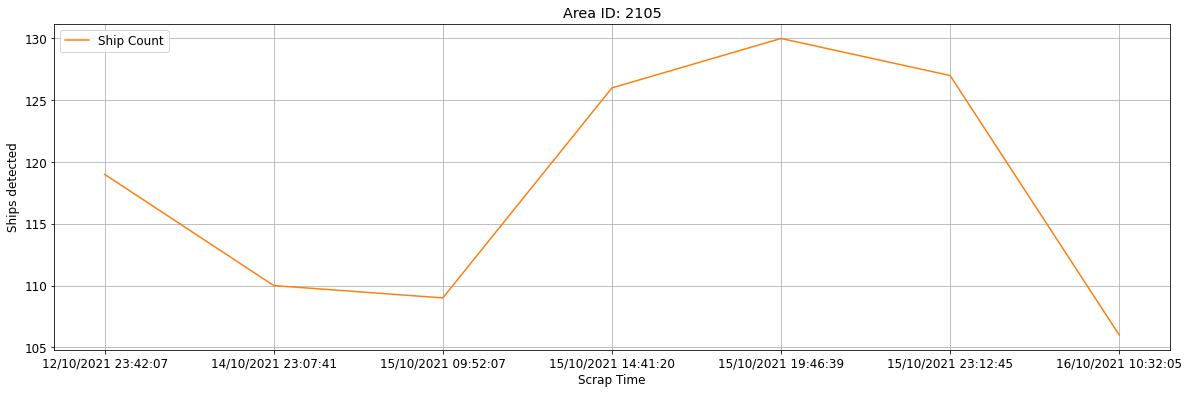

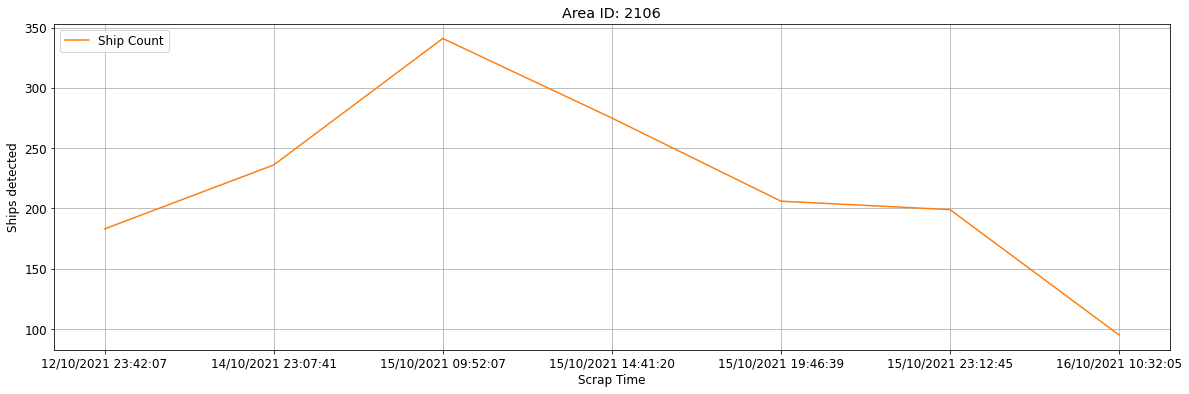

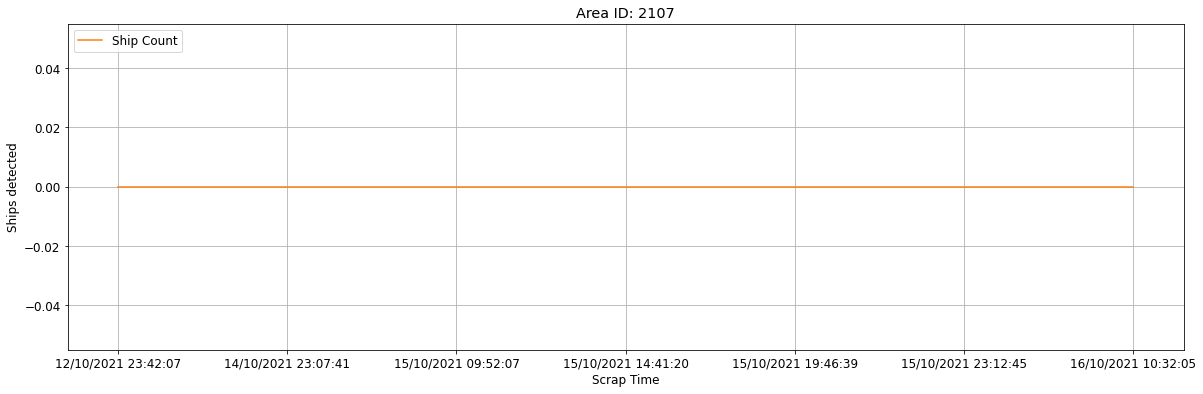

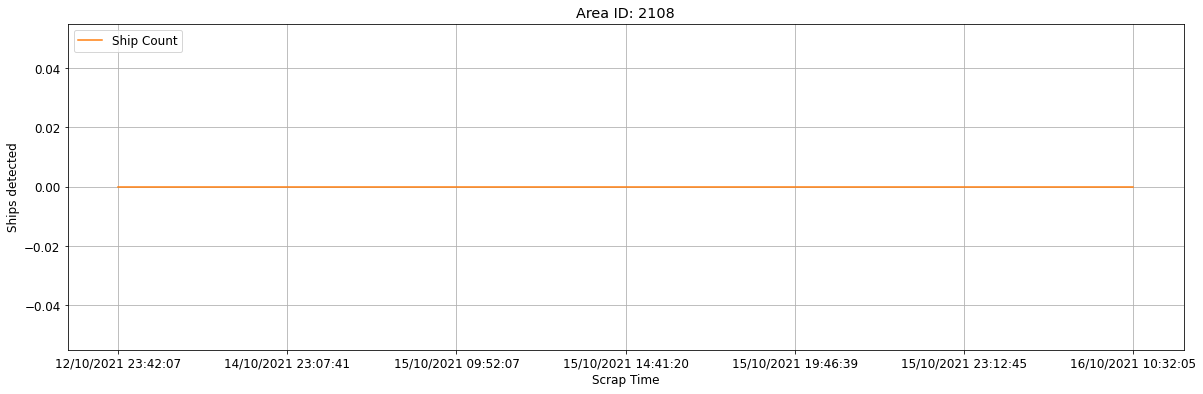

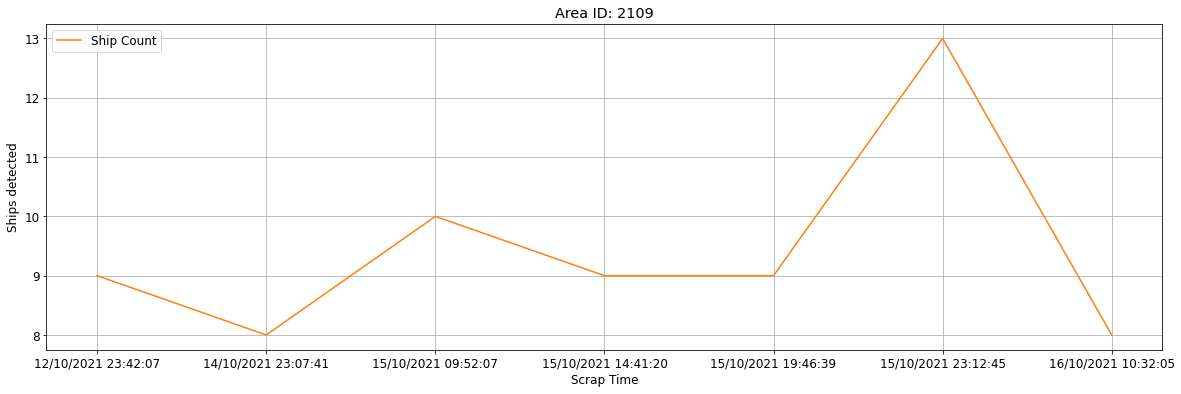

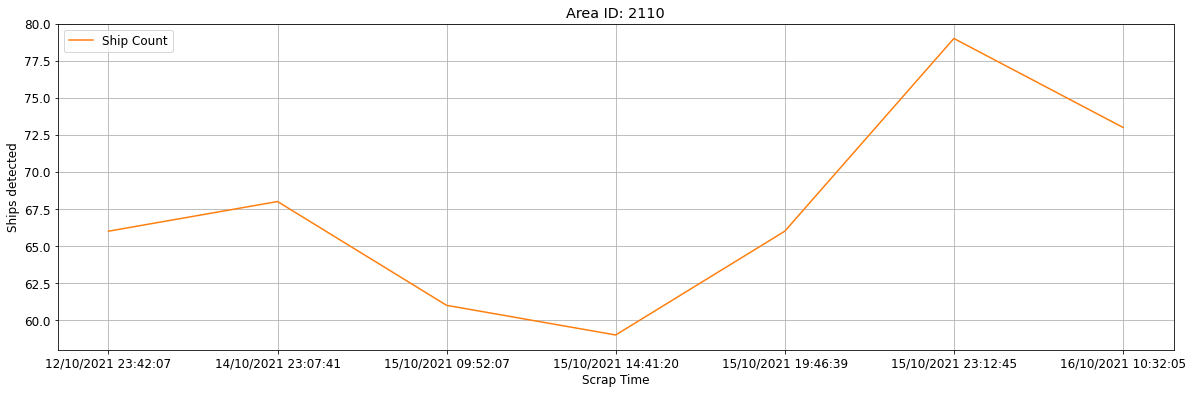

In [85]:
import numpy as np
# Set-up to have matplotlib use its support for notebook inline plots
%matplotlib inline
 


for i in range(0,100):
    plt.rc('font', size=12)
    fig, ax = plt.subplots(figsize=(20, 6))
    scrap_time = ["12/10/2021 23:42:07","14/10/2021 23:07:41","15/10/2021 09:52:07","15/10/2021 14:41:20","15/10/2021 19:46:39","15/10/2021 23:12:45","16/10/2021 10:32:05"]
    y_ax = [final_copy["12/10/2021 23:42:07"][i],final_copy["14/10/2021 23:07:41"][i],final_copy["15/10/2021 09:52:07"][i],final_copy["15/10/2021 14:41:20"][i],final_copy["15/10/2021 19:46:39"][i],final_copy["15/10/2021 23:12:45"][i],final_copy["16/10/2021 10:32:05"][i]]
    # Specify how our lines should look
    ax.plot(scrap_time,y_ax, color='tab:orange', label='Ship Count')

    # Same as above
    ax.set_xlabel('Scrap Time')
    ax.set_ylabel('Ships detected')
    ax.set_title('Area ID: {}'.format(final_copy["Area id"][i]))
    ax.grid(True)
    ax.legend(loc='upper left');